# *Personalized Movie Recommendation System*

### In today's world of streaming services, users have access to a vast library of movies, making it challenging to decide what to watch next. To help users discover new content that aligns with their tastes, a Personalized Movie Recommendation System plays a crucial role.

#### In this project, we have built a recommendation system that provides tailored movie suggestions to users based on content similarities. The dataset used in this project includes movies from major streaming services like Netflix and Disney, containing details like genres, directors, cast, country, and release year. By leveraging these attributes, our system identifies patterns and relationships between movies, enabling it to recommend titles with similar features to those users have previously shown interest in.

##### Project Workflow:
1. Data Preprocessing: Clean and prepare the dataset to ensure high-quality data for analysis.
2. Feature Engineering: Convert relevant textual and categorical attributes into numerical representations, allowing us to calculate similarity between movies.
3. Recommendation Algorithm: Apply Content-Based Filtering to generate recommendations based on movie attributes like genre, cast, and description.
4. Visualization and Insights: Provide visual insights into the dataset to understand trends, genre distributions, and other factors influencing recommendations.

## Import important libraries

In [118]:
# Numerical operations
import numpy as np  # Efficient numerical computations with arrays and matrices

# Data visualization libraries
import matplotlib.pyplot as plt  # Core plotting library for static visualizations
import seaborn as sns  # Enhances matplotlib with additional statistical plotting capabilities
import plotly.express as px  # Library for creating interactive and intuitive plots
import networkx as nx  # Used for creating, analyzing, and visualizing network graphs

# Mathematical operations and time tracking
import math as math  # Provides mathematical functions
import time  # Helps measure the runtime of code blocks

# Data manipulation
import pandas as pd  # Core data manipulation and analysis library for working with data in tables

# Additional matplotlib tools for advanced visualizations
from matplotlib.text import Text  # Text rendering in matplotlib plots
from matplotlib.lines import Line2D  # Allows customization of line properties
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting capabilities
from matplotlib.patches import Rectangle, Polygon  # Draws geometric shapes on plots

# Interactive plots
from plotly import graph_objects as go  # Advanced plotting functions, especially for interactive 3D visualizations

# Useful for counting occurrences of items
from collections import Counter  # Counts occurrences of items in data collections

# Statistical functions
from scipy.stats import norm  # Provides functions related to normal distribution

# Text processing for NLP
from nltk.corpus import stopwords  # Collection of common English words to ignore in text analysis
from wordcloud import WordCloud  # Creates a word cloud visualization of text data

# Data preprocessing and vectorization for machine learning
from sklearn.preprocessing import MultiLabelBinarizer  # Encodes categorical labels as binary indicators (similar to One-Hot Encoding)
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text data into feature vectors for machine learning

# Similarity calculations
from sklearn.metrics.pairwise import linear_kernel  # Computes the linear kernel (similarity) between vectors, useful for recommendation systems

# System utilities and warnings
import os  # Provides functions for interacting with the operating system
import warnings  # Controls warning messages
warnings.filterwarnings("ignore")  # Ignores warnings to keep output clean


## Loading the Dataset 

In [119]:
def Load_Read_Data():
    # Load Disney+ dataset
    df1 = pd.read_csv('disney_plus_titles.csv')
    
    # Load Netflix dataset
    df2 = pd.read_csv('netflix_titles.csv')
    
    # Return both dataframes
    return df1, df2

# Calling the function
disney_data, netflix_data  = Load_Read_Data()

In [120]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [121]:
disney_data.head()

show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...            NaN   
4  John Lennon, Paul McCartney, George Harrison, ...            NaN   

          date_added  release_year rating  duration  \
0  November 26, 2021          2016   TV-G    23 min   
1  November 26, 2021          1988     PG    91 min   
2  November 26, 2021          2011   TV-G    23 min   
3  November 26, 2021          2021  TV-PG    41 min   
4  November 25, 2021          2021    NaN  1 Season   

                       listed_in  \
0              Animation, Family   
1                         Comedy   
2      Animation, Comedy, Family   
3                        Musical   
4  Docuseries, Historical, Music   

                                         description  
0   Join Mickey and the gang as they duck the halls!  
1  Santa Claus passes his magic bag to a new St. ...  
2          Sid the Sloth is on Santa's naughty list.  
3               This is real life, not just fantasy!  
4  A three-part documentary from Peter Jackson ca...

In [122]:
netflix_data.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

## Filtering Data

In [123]:
# Filter the dataset to display rows where the 'duration' is exactly "312 min".
disney_data[disney_data["duration"] == "312 min"]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [124]:
# Filter the dataset to display rows where the 'duration' is exactly "312 min".
netflix_data[netflix_data["duration"] == "312 min"]

show_id   type                       title director  \
4253   s4254  Movie  Black Mirror: Bandersnatch      NaN   

                                                   cast        country  \
4253  Fionn Whitehead, Will Poulter, Craig Parkinson...  United States   

             date_added  release_year rating duration  \
4253  December 28, 2018          2018  TV-MA  312 min   

                                           listed_in  \
4253  Dramas, International Movies, Sci-Fi & Fantasy   

                                            description  
4253  In 1984, a young programmer begins to question...

In [125]:
# Locate rows in the 'duration' column of df2 where the value is "312 min"
# and replace those specific values with "90 min".
netflix_data.loc[netflix_data["duration"] == "312 min", "duration"] = "90 min"

In [126]:
# Filter the DataFrame to show any remaining rows where 'duration' is "312 min".
netflix_data[netflix_data["duration"] == "312 min"]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

###  Concatenates the Disney and Netflix datasets  into a single DataFrame:

In [127]:
# Concatenate the Disney (df1) and Netflix (df2) datasets into one unified DataFrame.
df_concat = pd.concat([disney_data, netflix_data], ignore_index=True)

In [128]:
# Print the shape of the concatenated DataFrame to get the number of rows and columns.
print(df_concat.shape)

(10257, 12)


In [129]:
# Generate descriptive statistics for numerical columns in the DataFrame.
df_concat.describe()

release_year
count  10257.000000
mean    2012.612655
std       12.215730
min     1925.000000
25%     2012.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [130]:
# Display concise summary information about the DataFrame, including column names, data types, and non-null counts.
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10257 entries, 0 to 10256
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       10257 non-null  object
 1   type          10257 non-null  object
 2   title         10257 non-null  object
 3   director      7150 non-null   object
 4   cast          9242 non-null   object
 5   country       9207 non-null   object
 6   date_added    10244 non-null  object
 7   release_year  10257 non-null  int64 
 8   rating        10250 non-null  object
 9   duration      10254 non-null  object
 10  listed_in     10257 non-null  object
 11  description   10257 non-null  object
dtypes: int64(1), object(11)
memory usage: 961.7+ KB


In [131]:
# Calculate and display the count of missing values in each column.
df_concat.isnull().sum()

show_id            0
type               0
title              0
director        3107
cast            1015
country         1050
date_added        13
release_year       0
rating             7
duration           3
listed_in          0
description        0
dtype: int64

In [132]:
df_concat.drop("show_id" , inplace=True , axis=1)

### This code defines a function that provides detailed information about the columns in a DataFrame, specifically for df_concat. 

In [133]:
# Define a function to gather information about the columns in the given DataFrame.
def columns_info(data):
    # Initialize lists to store information about each column.
    cols = []           # To store column names
    dtype = []          # To store data types of columns
    unique_v = []       # To store unique values in each column
    n_unique_v = []     # To store the count of unique values in each column
    nulls = []          # To store the count of null values in each column
    
    # Loop through each column in the DataFrame.
    for col in data.columns:
        cols.append(col)                                # Append the column name to the list
        dtype.append(data[col].dtypes)                  # Append the data type of the column
        nulls.append(data[col].isna().sum())            # Append the count of null values in the column
        n_unique_v.append(data[col].nunique())          # Append the number of unique values in the column
        unique_v.append(data[col].unique())             # Append the unique values in the column
        
    # Create and return a DataFrame containing the collected information.
    return pd.DataFrame({"names": cols, "dtypes": dtype, "nulls": nulls, "unique": unique_v, "n_unique": n_unique_v})

# Call the function and display the column information for df_concat.
columns_info(df_concat)

names  dtypes  nulls  \
0           type  object      0   
1          title  object      0   
2       director  object   3107   
3           cast  object   1015   
4        country  object   1050   
5     date_added  object     13   
6   release_year   int64      0   
7         rating  object      7   
8       duration  object      3   
9      listed_in  object      0   
10   description  object      0   

                                               unique  n_unique  
0                                    [Movie, TV Show]         2  
1   [Duck the Halls: A Mickey Mouse Christmas Spec...     10214  
2   [Alonso Ramirez Ramos, Dave Wasson, John Cherr...      5015  
3   [Chris Diamantopoulos, Tony Anselmo, Tress Mac...      8870  
4   [nan, United States, United States, Canada, Un...       782  
5   [November 26, 2021, November 25, 2021, Novembe...      1789  
6   [2016, 1988, 2011, 2021, 2015, 2019, 2008, 202...        92  
7   [TV-G, PG, TV-PG, nan, PG-13, TV-14, G, TV-Y7,...        17  
8   [23 min, 91 min, 41 min, 1 Season, 94 min, 2 S...       229  
9   [Animation, Family, Comedy, Animation, Comedy,...       841  
10  [Join Mickey and the gang as they duck the hal...     10223

In [134]:
def calculate_null_rates(df_concat):
    """
    Function to calculate and print the null rate for each column in a DataFrame.
    
    Parameters:
    df_concat (DataFrame): The DataFrame for which to calculate null rates.
    
    Returns:
    None
    """
    for i in df_concat.columns:
        # Calculate the null rate as a percentage
        null_rate = df_concat[i].isna().sum() / len(df_concat) * 100
        
        # If null rate is greater than 0%, print the column and its null rate
        if null_rate > 0:
            print("{} null rate: {}%".format(i, round(null_rate, 2)))

In [135]:
# Example of how to call the function:
calculate_null_rates(df_concat)

director null rate: 30.29%
cast null rate: 9.9%
country null rate: 10.24%
date_added null rate: 0.13%
rating null rate: 0.07%
duration null rate: 0.03%


In [136]:
df_concat.iloc[5:10]

type                                  title          director  \
5    Movie                      Becoming Cousteau        Liz Garbus   
6  TV Show                                Hawkeye               NaN   
7  TV Show                 Port Protection Alaska               NaN   
8  TV Show              Secrets of the Zoo: Tampa               NaN   
9    Movie  A Muppets Christmas: Letters To Santa  Kirk R. Thatcher   

                                                cast        country  \
5              Jacques Yves Cousteau, Vincent Cassel  United States   
6  Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...            NaN   
7  Gary Muehlberger, Mary Miller, Curly Leach, Sa...  United States   
8  Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...  United States   
9  Steve Whitmire, Dave Goelz, Bill Barretta, Eri...  United States   

          date_added  release_year rating   duration  \
5  November 24, 2021          2021  PG-13     94 min   
6  November 24, 2021          2021  TV-14   1 Season   
7  November 24, 2021          2015  TV-14  2 Seasons   
8  November 24, 2021          2019  TV-PG  2 Seasons   
9  November 19, 2021          2008      G     45 min   

                              listed_in  \
5             Biographical, Documentary   
6           Action-Adventure, Superhero   
7         Docuseries, Reality, Survival   
8  Animals & Nature, Docuseries, Family   
9               Comedy, Family, Musical   

                                         description  
5  An inside look at the legendary life of advent...  
6  Clint Barton/Hawkeye must team up with skilled...  
7  Residents of Port Protection must combat volat...  
8  A day in the life at ZooTampa is anything but ...  
9  Celebrate the holiday season with all your fav...

## Check Duplicates

In [137]:
# Count the total number of duplicate rows in the DataFrame.
df_concat.duplicated().sum()

0

In [138]:
# Count the number of duplicate rows based on the combination of 'title', 'release_year', and 'rating' columns.
df_concat.duplicated(subset=['title', 'release_year', 'rating']).sum()

23

In [139]:
# Create a new DataFrame containing all rows that are duplicates based on the same subset of columns.
new_data = df_concat[df_concat.duplicated(subset=['title', 'release_year', 'rating'], keep=False)]
# Display the first few rows of the DataFrame containing duplicate entries.
new_data.head()

type                                         title  \
12   Movie                               The Pixar Story   
220  Movie  Tinker Bell and the Legend of the NeverBeast   
314  Movie                          Mary Poppins Returns   
350  Movie            The Nutcracker and the Four Realms   
415  Movie                             Christopher Robin   

                          director  \
12                   Leslie Iwerks   
220                    Steve Loter   
314                   Rob Marshall   
350  Lasse Hallström, Joe Johnston   
415                   Marc Forster   

                                                  cast  \
12   Stacy Keach, John Lasseter, Brad Bird, John Mu...   
220  Ginnifer Goodwin, Mae Whitman, Rosario Dawson,...   
314  Emily Blunt, Lin-Manuel Miranda, Ben Whishaw, ...   
350  Keira Knightley, Mackenzie Foy, Eugenio Derbez...   
415  Ewan McGregor, Hayley Atwell, Bronte Carmichae...   

                           country          date_added  release_year rating  \
12                   United States   November 19, 2021          2007      G   
220                  United States        May 21, 2021          2014      G   
314  United States, United Kingdom    January 15, 2021          2018     PG   
350                  United States    December 4, 2020          2018     PG   
415  United Kingdom, United States  September 11, 2020          2018     PG   

    duration                             listed_in  \
12    91 min                   Documentary, Family   
220   79 min  Action-Adventure, Animation, Fantasy   
314  140 min              Family, Fantasy, Musical   
350  101 min     Action-Adventure, Family, Fantasy   
415  109 min                Drama, Family, Fantasy   

                                           description  
12   A groundbreaking company forever changes the f...  
220  Tink and her friends risk everything to rescue...  
314  Mary Poppins is back to help the Banks family ...  
350  From Disney comes the reimagined tale of The N...  
415  Pooh leaves the Hundred Acre Wood to help grow...

In [140]:
# Remove duplicate rows from the DataFrame based on the combination of 'title', 'release_year', and 'rating' columns.
# The 'inplace=True' parameter modifies the original DataFrame rather than returning a new one.
df_concat.drop_duplicates(subset=['title','release_year','rating'], inplace=True)

# Display the shape of the DataFrame again (this is redundant as it's already shown above, but it's okay for confirmation).
df_concat.shape

(10234, 11)

In [141]:
# Display the shape of the DataFrame again (this is redundant as it's already shown above, but it's okay for confirmation).
df_concat.shape

(10234, 11)

In [142]:
# Check and display the count of missing values in each column of the updated DataFrame.
df_concat.isnull().sum()

type               0
title              0
director        3107
cast            1015
country         1050
date_added        13
release_year       0
rating             7
duration           3
listed_in          0
description        0
dtype: int64

In [143]:
df_concat.shape

(10234, 11)

### Handling missing values in the country, cast, and director columns of the df_concat DataFrame.

In [144]:
import numpy as np

def handle_missing_values(df_concat):
    # Fill missing values in the 'country' column with the most frequent value (mode)
    df_concat['country'] = df_concat['country'].fillna(df_concat['country'].mode()[0])

    # Replace NaN values in the 'cast' and 'director' columns with 'No Data'
    df_concat['cast'].replace(np.nan, 'No Data', inplace=True)
    df_concat['director'].replace(np.nan, 'No Data', inplace=True)

    # Check and display the count of missing values in each column
    missing_values = df_concat.isnull().sum()
    print(missing_values)
    
    return df_concat

In [145]:
df_concat = handle_missing_values(df_concat)

type             0
title            0
director         0
cast             0
country          0
date_added      13
release_year     0
rating           7
duration         3
listed_in        0
description      0
dtype: int64


In [146]:
# Display the first few rows of the DataFrame to inspect the current state of the data.
df_concat.head()

type                                             title  \
0    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1    Movie                            Ernest Saves Christmas   
2    Movie                      Ice Age: A Mammoth Christmas   
3    Movie                        The Queen Family Singalong   
4  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                            No Data   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  United States   
1           Jim Varney, Noelle Parker, Douglas Seale  United States   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...  United States   
4  John Lennon, Paul McCartney, George Harrison, ...  United States   

          date_added  release_year rating  duration  \
0  November 26, 2021          2016   TV-G    23 min   
1  November 26, 2021          1988     PG    91 min   
2  November 26, 2021          2011   TV-G    23 min   
3  November 26, 2021          2021  TV-PG    41 min   
4  November 25, 2021          2021    NaN  1 Season   

                       listed_in  \
0              Animation, Family   
1                         Comedy   
2      Animation, Comedy, Family   
3                        Musical   
4  Docuseries, Historical, Music   

                                         description  
0   Join Mickey and the gang as they duck the halls!  
1  Santa Claus passes his magic bag to a new St. ...  
2          Sid the Sloth is on Santa's naughty list.  
3               This is real life, not just fantasy!  
4  A three-part documentary from Peter Jackson ca...

### This code is used to convert the date_added column in the df_concat DataFrame to a datetime format. 

In [147]:
def convert_date_added_to_datetime(df_concat):
    # Convert the 'date_added' column to datetime format
    df_concat['date_added'] = pd.to_datetime(df_concat['date_added'], errors='coerce')  # Using errors='coerce' to handle any invalid dates
    return df_concat

In [148]:
df_concat = convert_date_added_to_datetime(df_concat)

In [149]:
df_concat['date_added'].dtype

dtype('<M8[ns]')

### This code is used to extract the month, month name, and year from the date_added column in the df_concat DataFrame and store these values in new columns. 

In [150]:
def extract_date_components(df_concat):
    # Extract the month from the 'date_added' column
    df_concat['month_added'] = df_concat['date_added'].dt.month

    # Extract the full month name from the 'date_added' column
    df_concat['month_name_added'] = df_concat['date_added'].dt.month_name()

    # Extract the year from the 'date_added' column
    df_concat['year_added'] = df_concat['date_added'].dt.year

    # Display the first few rows of the DataFrame to inspect the new columns added    
    return df_concat

In [151]:
df_concat = extract_date_components(df_concat)

In [152]:
df_concat.head()

type                                             title  \
0    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1    Movie                            Ernest Saves Christmas   
2    Movie                      Ice Age: A Mammoth Christmas   
3    Movie                        The Queen Family Singalong   
4  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                            No Data   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  United States   
1           Jim Varney, Noelle Parker, Douglas Seale  United States   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...  United States   
4  John Lennon, Paul McCartney, George Harrison, ...  United States   

  date_added  release_year rating  duration                      listed_in  \
0 2021-11-26          2016   TV-G    23 min              Animation, Family   
1 2021-11-26          1988     PG    91 min                         Comedy   
2 2021-11-26          2011   TV-G    23 min      Animation, Comedy, Family   
3 2021-11-26          2021  TV-PG    41 min                        Musical   
4 2021-11-25          2021    NaN  1 Season  Docuseries, Historical, Music   

                                         description  month_added  \
0   Join Mickey and the gang as they duck the halls!         11.0   
1  Santa Claus passes his magic bag to a new St. ...         11.0   
2          Sid the Sloth is on Santa's naughty list.         11.0   
3               This is real life, not just fantasy!         11.0   
4  A three-part documentary from Peter Jackson ca...         11.0   

  month_name_added  year_added  
0         November      2021.0  
1         November      2021.0  
2         November      2021.0  
3         November      2021.0  
4         November      2021.0

In [153]:
# Print the data type of the 'month_added' column to confirm it is of integer type.
print(df_concat['month_added'].dtype)

# Print the unique values in the 'month_added' column to see which months are present in the dataset.
print(df_concat['month_added'].unique())


float64
[11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 12. nan]


In [154]:
# Convert the 'month_added' column to a numeric type, coercing any errors into NaN, and then cast it to an Int64 type.
pd.to_numeric(df_concat['month_added'], errors='coerce').astype('Int64')

0        11
1        11
2        11
3        11
4        11
         ..
10252    11
10253     7
10254    11
10255     1
10256     3
Name: month_added, Length: 10234, dtype: Int64

In [155]:
# Print the unique values in the 'month_added' column to see if there are any NaN values after conversion.
print(df_concat['month_added'].unique())

[11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 12. nan]


In [156]:
# Drop rows from the DataFrame where 'month_added' is NaN, ensuring only valid entries remain.
df_concat = df_concat.dropna(subset=['month_added'])

In [157]:
# Print the unique values in the 'month_added' column to inspect the remaining entries after dropping NaN values.
print(df_concat['month_added'].unique())

[11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1. 12.]


### This code converts the data types of the month_added and year_added columns to integers and then displays the first few rows of the updated DataFrame.

In [158]:
# Convert the 'month_added' column to integer type.
df_concat['month_added'] = df_concat['month_added'].astype(int)

# Convert the 'year_added' column to integer type.
df_concat['year_added'] = df_concat['year_added'].astype(int)

# Display the first few rows of the DataFrame to verify the changes.
df_concat.head()

type                                             title  \
0    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1    Movie                            Ernest Saves Christmas   
2    Movie                      Ice Age: A Mammoth Christmas   
3    Movie                        The Queen Family Singalong   
4  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                            No Data   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  United States   
1           Jim Varney, Noelle Parker, Douglas Seale  United States   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...  United States   
4  John Lennon, Paul McCartney, George Harrison, ...  United States   

  date_added  release_year rating  duration                      listed_in  \
0 2021-11-26          2016   TV-G    23 min              Animation, Family   
1 2021-11-26          1988     PG    91 min                         Comedy   
2 2021-11-26          2011   TV-G    23 min      Animation, Comedy, Family   
3 2021-11-26          2021  TV-PG    41 min                        Musical   
4 2021-11-25          2021    NaN  1 Season  Docuseries, Historical, Music   

                                         description  month_added  \
0   Join Mickey and the gang as they duck the halls!           11   
1  Santa Claus passes his magic bag to a new St. ...           11   
2          Sid the Sloth is on Santa's naughty list.           11   
3               This is real life, not just fantasy!           11   
4  A three-part documentary from Peter Jackson ca...           11   

  month_name_added  year_added  
0         November        2021  
1         November        2021  
2         November        2021  
3         November        2021  
4         November        2021

#### This code extracts the type of movie from the listed_in column of the df_concat DataFrame and counts the occurrences of each genre.

In [159]:
def extract_movie_genre_counts(df_concat):
    # Extract the first word from the 'listed_in' column to categorize the type of movie
    df_concat['type_of_movie'] = df_concat['listed_in'].str.extract('(^\w+)', expand=True)

    # Count the occurrences of each genre in the newly created 'type_of_movie' column
    genre_counts_movie = df_concat['type_of_movie'].value_counts().reset_index()

    # Rename the columns of the resulting DataFrame to 'type_of_movie' and 'count'
    genre_counts_movie.columns = ['type_of_movie', 'count']

    return genre_counts_movie

In [160]:
# Example of how to call the function:
genre_counts_movie = extract_movie_genre_counts(df_concat)
genre_counts_movie.head()

type_of_movie  count
0         Dramas   1600
1         Action   1305
2       Comedies   1209
3  International    889
4  Documentaries    828

In [161]:
df_concat.head()

type                                             title  \
0    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1    Movie                            Ernest Saves Christmas   
2    Movie                      Ice Age: A Mammoth Christmas   
3    Movie                        The Queen Family Singalong   
4  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                            No Data   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...  United States   
1           Jim Varney, Noelle Parker, Douglas Seale  United States   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough, Alexa...  United States   
4  John Lennon, Paul McCartney, George Harrison, ...  United States   

  date_added  release_year rating  duration                      listed_in  \
0 2021-11-26          2016   TV-G    23 min              Animation, Family   
1 2021-11-26          1988     PG    91 min                         Comedy   
2 2021-11-26          2011   TV-G    23 min      Animation, Comedy, Family   
3 2021-11-26          2021  TV-PG    41 min                        Musical   
4 2021-11-25          2021    NaN  1 Season  Docuseries, Historical, Music   

                                         description  month_added  \
0   Join Mickey and the gang as they duck the halls!           11   
1  Santa Claus passes his magic bag to a new St. ...           11   
2          Sid the Sloth is on Santa's naughty list.           11   
3               This is real life, not just fantasy!           11   
4  A three-part documentary from Peter Jackson ca...           11   

  month_name_added  year_added type_of_movie  
0         November        2021     Animation  
1         November        2021        Comedy  
2         November        2021     Animation  
3         November        2021       Musical  
4         November        2021    Docuseries

# Handling Rating

In [162]:
# Check if there are any entries with a rating of "74 min"
df_concat[df_concat["rating"]=="74 min"]

type            title    director        cast        country  \
6991  Movie  Louis C.K. 2017  Louis C.K.  Louis C.K.  United States   

     date_added  release_year  rating duration listed_in  \
6991 2017-04-04          2017  74 min      NaN    Movies   

                                            description  month_added  \
6991  Louis C.K. muses on religion, eternal love, gi...            4   

     month_name_added  year_added type_of_movie  
6991            April        2017        Movies

In [163]:
# Check if there are any entries with a rating of "84 min"
df_concat[df_concat["rating"]=="84 min"]

type                  title    director        cast        country  \
7244  Movie  Louis C.K.: Hilarious  Louis C.K.  Louis C.K.  United States   

     date_added  release_year  rating duration listed_in  \
7244 2016-09-16          2010  84 min      NaN    Movies   

                                            description  month_added  \
7244  Emmy-winning comedy writer Louis C.K. brings h...            9   

     month_name_added  year_added type_of_movie  
7244        September        2016        Movies

In [164]:
# Check if there are any entries with a rating of "66 min"
df_concat[df_concat["rating"]=="66 min"]

type                                 title    director        cast  \
7263  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.  Louis C.K.   

            country date_added  release_year  rating duration listed_in  \
7263  United States 2016-08-15          2015  66 min      NaN    Movies   

                                            description  month_added  \
7263  The comic puts his trademark hilarious/thought...            8   

     month_name_added  year_added type_of_movie  
7263           August        2016        Movies

In [165]:
# Count the occurrences of each unique value in the 'rating' column
df_concat["rating"].value_counts()

rating
TV-MA       3183
TV-14       2212
TV-PG       1139
R            799
PG-13        553
TV-G         530
PG           509
TV-Y7        459
TV-Y         349
G            288
NR            78
TV-Y7-FV      18
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

### This code identifies and drops specific ratings from the rating column of the df_concat DataFrame.

In [166]:
def drop_specific_ratings(df_concat, ratings_to_drop):
    # Get the indices of the rows where the 'rating' is in the specified list
    indices_to_drop = df_concat[df_concat["rating"].isin(ratings_to_drop)].index
    
    # Drop the rows with the specified indices from the DataFrame
    df_concat = df_concat.drop(indices_to_drop)

    return df_concat

In [167]:
# Define the list of ratings to drop
ratings_to_drop = ["66 min", "84 min", "74 min"]

# Example of how to call the function:
df_concat = drop_specific_ratings(df_concat, ratings_to_drop)

In [168]:
# Count the occurrences of each unique value in the 'rating' column
df_concat["rating"].value_counts()

rating
TV-MA       3183
TV-14       2212
TV-PG       1139
R            799
PG-13        553
TV-G         530
PG           509
TV-Y7        459
TV-Y         349
G            288
NR            78
TV-Y7-FV      18
NC-17          3
UR             3
Name: count, dtype: int64

In [169]:
df_concat.iloc[10:15]

type                                    title       director  \
10    Movie  Adventure Thru the Walt Disney Archives     John Gleim   
11    Movie                       Puppy for Hanukkah        No Data   
12    Movie                          The Pixar Story  Leslie Iwerks   
13  TV Show                    Dr. Oakley, Yukon Vet        No Data   
14    Movie                    America the Beautiful        No Data   

                                                 cast        country  \
10  Don Hahn, Kathryn Beaumont, Pete Docter, Kevin...  United States   
11                                            No Data  United States   
12  Stacy Keach, John Lasseter, Brad Bird, John Mu...  United States   
13                  Dr. Michelle Oakley, Zachary Fine  United States   
14                                  Michael B. Jordan  United States   

   date_added  release_year rating    duration  \
10 2021-11-19          2020  TV-PG      59 min   
11 2021-11-19          2020   TV-G       4 min   
12 2021-11-19          2007      G      91 min   
13 2021-11-17          2013  TV-PG  10 Seasons   
14 2021-11-12          2021  TV-PG       2 min   

                                         listed_in  \
10                                     Documentary   
11                           Comedy, Family, Music   
12                             Documentary, Family   
13  Action-Adventure, Animals & Nature, Docuseries   
14                                Animals & Nature   

                                          description  month_added  \
10  Explore the treasures and rich history of the ...           11   
11  Check out Daveed Digg's official music video "...           11   
12  A groundbreaking company forever changes the f...           11   
13  Meet Dr. Michelle Oakley, vet to pretty much e...           11   
14  Epic, grand portrait of the land across four r...           11   

   month_name_added  year_added type_of_movie  
10         November        2021   Documentary  
11         November        2021        Comedy  
12         November        2021   Documentary  
13         November        2021        Action  
14         November        2021       Animals

# Visualization 

## TV SHOW VS MOVIES

#### The code provided calculates the ratio of movies and TV shows in the concatenated DataFrame df_concat.

In [170]:
# Group the DataFrame by the 'type' column and count the number of entries for each type (Movie or Series)
x = df_concat.groupby(['type'])['type'].count()

# Get the total number of entries in the DataFrame
y = len(df_concat)

# Calculate the ratio of each type to the total number of entries, rounding to 2 decimal places
r = ((x / y)).round(2)

# Convert the ratio Series into a DataFrame and transpose it for better presentation
mf_ratio = pd.DataFrame(r).T
mf_ratio

type  Movie  TV Show
type   0.71     0.29

#### The code to create a count plot for the 'type' column in the DataFrame.

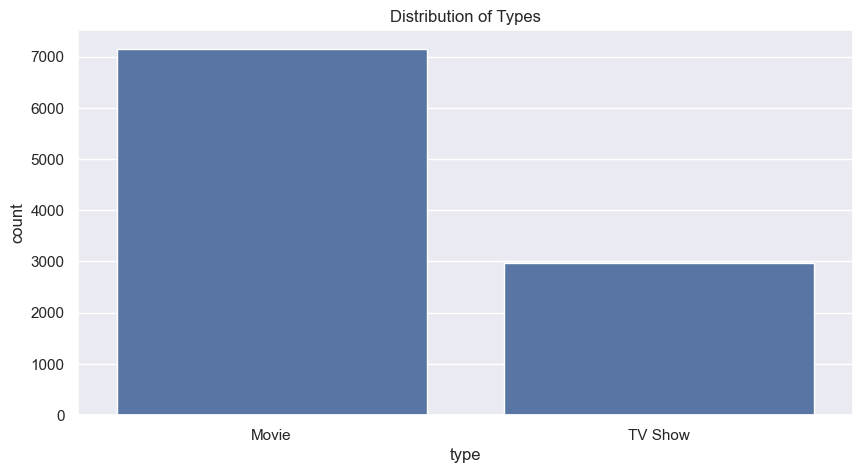

In [171]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Create a count plot for the 'type' column using seaborn
sns.countplot(data=df_concat, x='type')

# Set the title of the plot
plt.title('Distribution of Types')

# Display the plot
plt.show()

### The code for creating a pie chart that visualizes the distribution of types (Movies and Series) in the dataset.

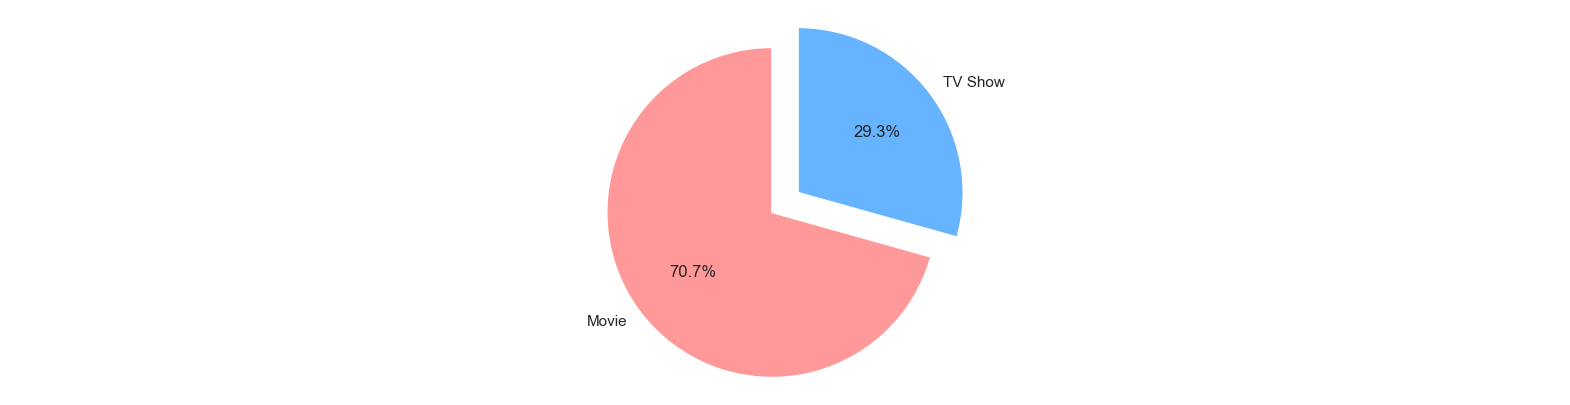

In [172]:
# Set the default figure size for all plots
plt.rcParams["figure.figsize"] = (20, 5)

# Get the counts of each unique value in the 'type' column
values = df_concat["type"].value_counts()

# Extract the labels for the pie chart from the index of the counts
labels = values.index

# Define custom colors for the pie slices
colors = ['#ff9999', '#66b3ff']

# Define the explode effect for each slice (to emphasize each slice, you can customize the explode amount)
explode = [0.1] * len(labels)  # Here, all slices will have the same explode value

# Create the pie chart
plt.pie(values, 
        labels=labels, 
        colors=colors, 
        explode=explode, 
        autopct='%1.1f%%',  # Display the percentage on the slices
        startangle=90)  # Start the pie chart from the top

# Ensure that the pie chart is a circle
plt.axis('equal')  
plt.savefig("figure.png")
# Display the pie chart
plt.show()

## Country

### The code for creating a choropleth map and a horizontal bar chart to visualize the number of content pieces by country looks great!

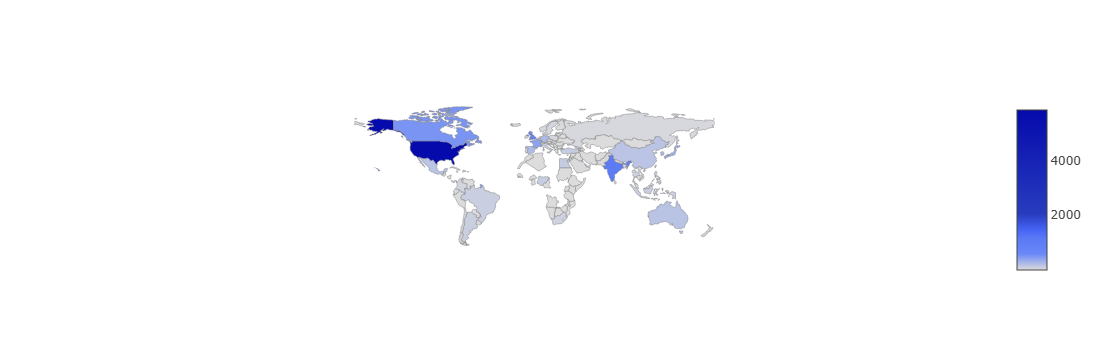

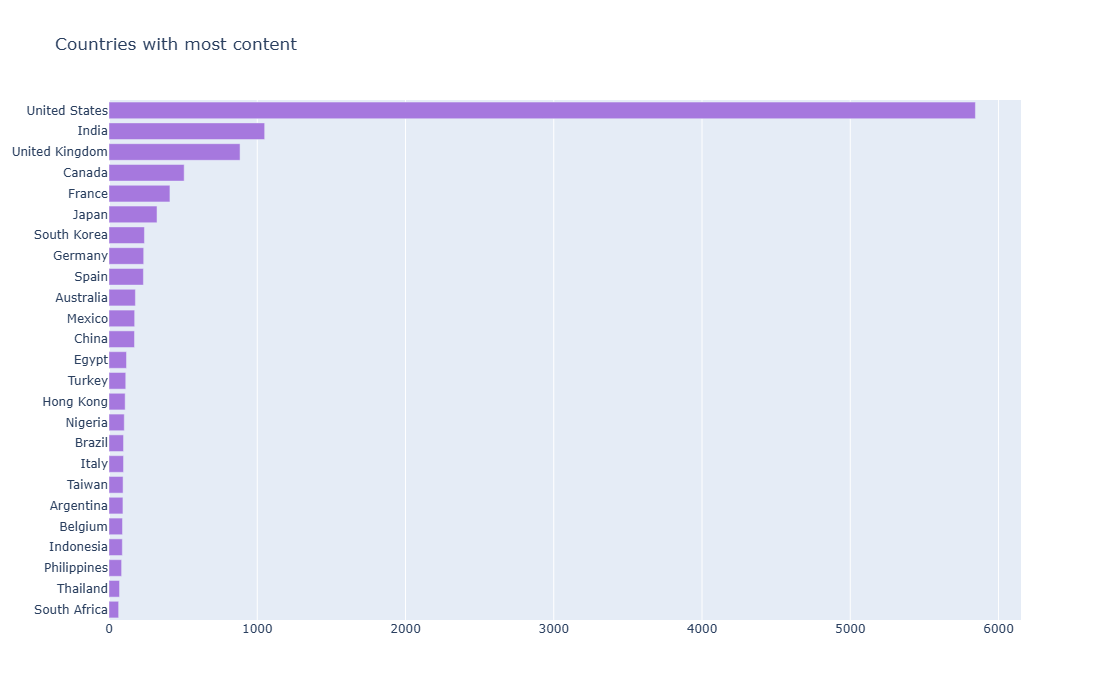

In [173]:
# A dictionary mapping country names to their corresponding country codes
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

# Import necessary libraries for data analysis and visualization
from collections import Counter
from plotly.offline import iplot

# Define a color scale for the choropleth map
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

# Function to plot a choropleth map for a given variable
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(df_concat['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df_concat)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [174]:
def plot_top_entries_pie_chart(df, column_name, start_index=0, end_index=11, title='Top Entries'):
    # Count the occurrences of each entry in the specified column
    data = df[column_name].value_counts().iloc[start_index:end_index].to_dict()

    # Convert the dictionary into a DataFrame with columns 'Entry' and 'Count'
    entry_data = pd.DataFrame(list(data.items()), columns=['Entry', 'Count'])

    # Define explode parameter to slightly separate the first slice from the pie chart
    explode = (0.1,) + (0,) * (entry_data.shape[0] - 1)  # Only explode the first slice

    # Create a figure with a specified size for the pie chart
    plt.figure(figsize=(8, 8))

    # Plot the pie chart with specified parameters
    plt.pie(entry_data['Count'], 
            labels=entry_data['Entry'], 
            autopct='%1.1f%%', 
            startangle=45, 
            colors=sns.color_palette('viridis', n_colors=entry_data.shape[0]),
            explode=explode)

    # Set the title for the pie chart
    plt.title(title)

    # Display the pie chart
    plt.show()

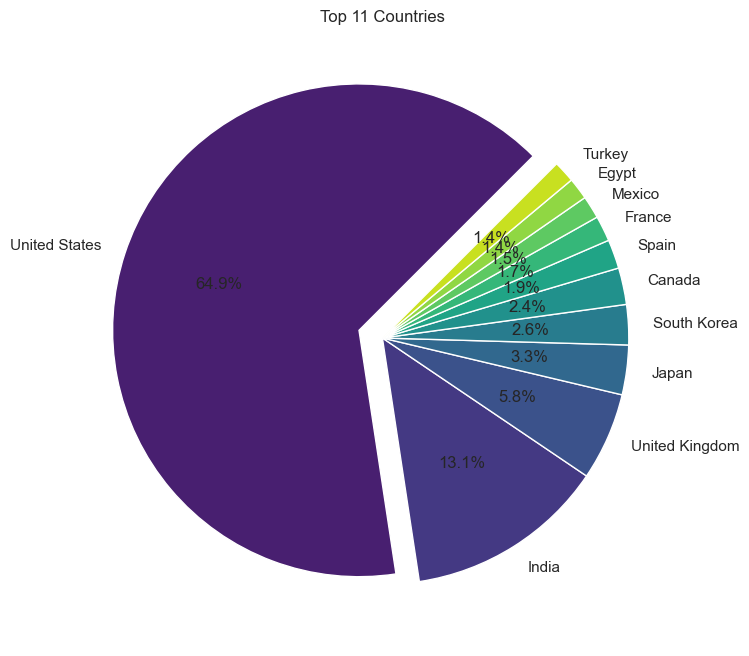

In [175]:
plot_top_entries_pie_chart(df_concat, 'country', start_index=0, end_index=11, title='Top 11 Countries')

#### This code generates a word cloud from the description column of the df_concat DataFrame. 
## Description
#### The code for creating a Word Cloud that visualizes the most frequently occurring words in the descriptions of the dataset. This visualization helps to identify key themes and concepts within the text data.

In [176]:
def generate_word_cloud(df_concat, column_name, unique=False):
    if unique:
        # Get unique values from the specified column and join them into a single string
        text = " ".join(set(df_concat[column_name]))
    else:
        # Join the second word of each entry in the specified column into a single string
        text = " ".join(cat.split()[1] for cat in df_concat[column_name] if len(cat.split()) > 1)

    # Check if the generated text is empty
    if not text.strip():  # Check if the text is empty or contains only whitespace
        print("No valid words to generate the word cloud.")
        return  # Exit the function if there's nothing to generate

    # Create a word cloud using the generated text
    word_cloud = WordCloud(collocations=False, background_color='white').generate(text)

    # Set up the figure for displaying the word cloud
    plt.figure(figsize=(15, 15))

    # Display the generated word cloud with bilinear interpolation for smoothness
    plt.imshow(word_cloud, interpolation='bilinear')

    # Turn off the axes for a cleaner presentation
    plt.axis("off")

    # Show the word cloud
    plt.show()

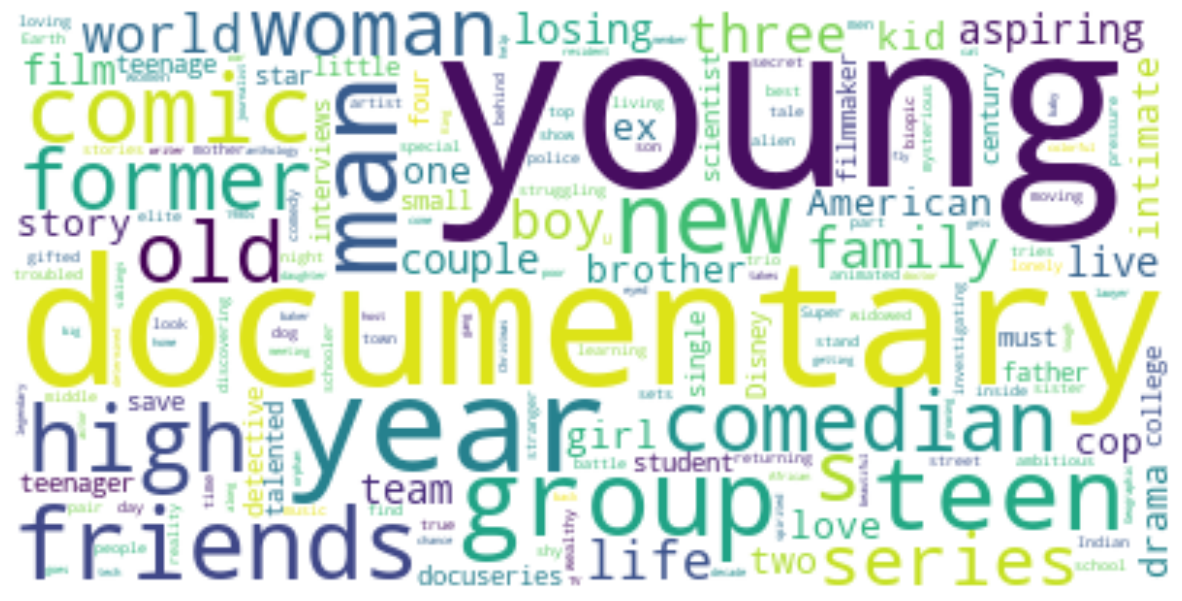

In [177]:
generate_word_cloud(df_concat, 'description')

# genre_counts_movie [genre_counts_movie ] (LISTED IN)

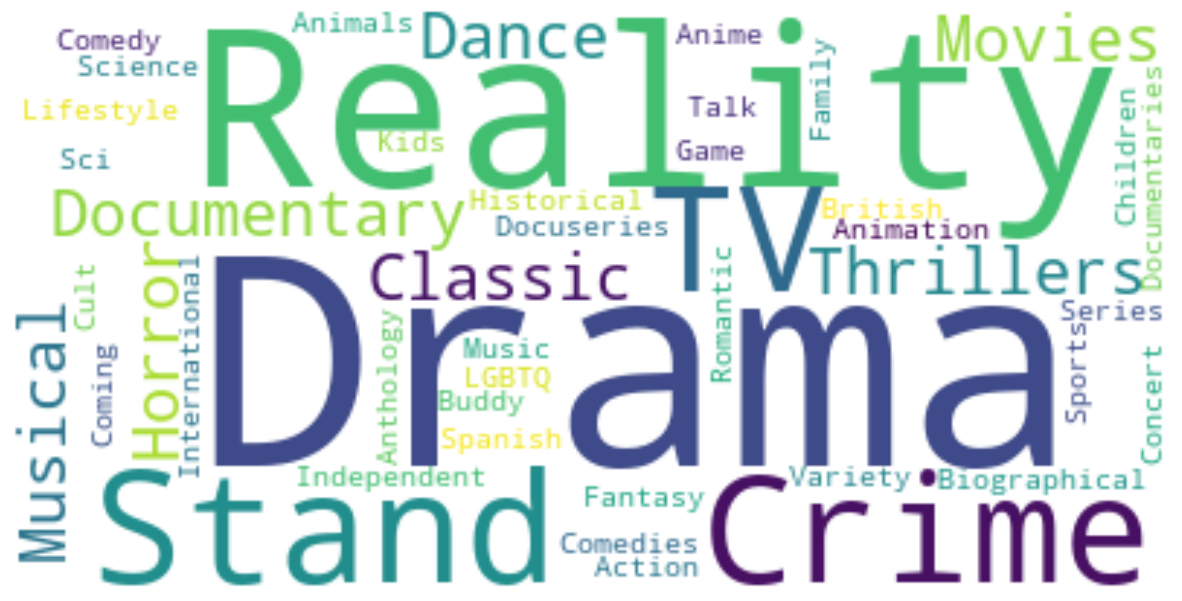

In [178]:
generate_word_cloud(genre_counts_movie, 'type_of_movie', unique=True)

## **Release year**
### The code for creating a count plot that visualizes the distribution of movie releases by year in the dataset. The count plot will help us identify trends in movie production over time, providing insights into which years were particularly prolific for movie releases.

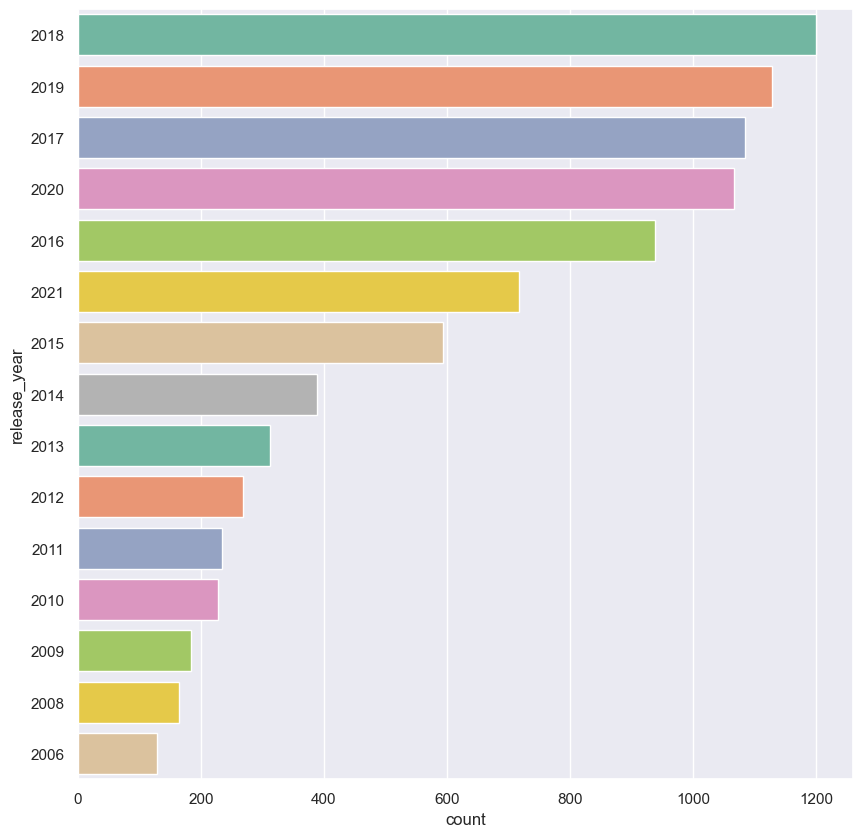

In [179]:
plt.figure(figsize=(10,10))  # Sets the figure size to 10x10 inches
sns.set(style="darkgrid")    # Sets the seaborn style to darkgrid for better visualization
ax = sns.countplot(y="release_year", data=df_concat, palette="Set2", order=df_concat['release_year'].value_counts().index[0:15])

## ***Rating***
#### The code for creating a count plot that visualizes the distribution of ratings in the dataset. This count plot will provide insights into how many movies or series fall into each rating category, helping to identify trends in viewer preferences and content rating distributions.

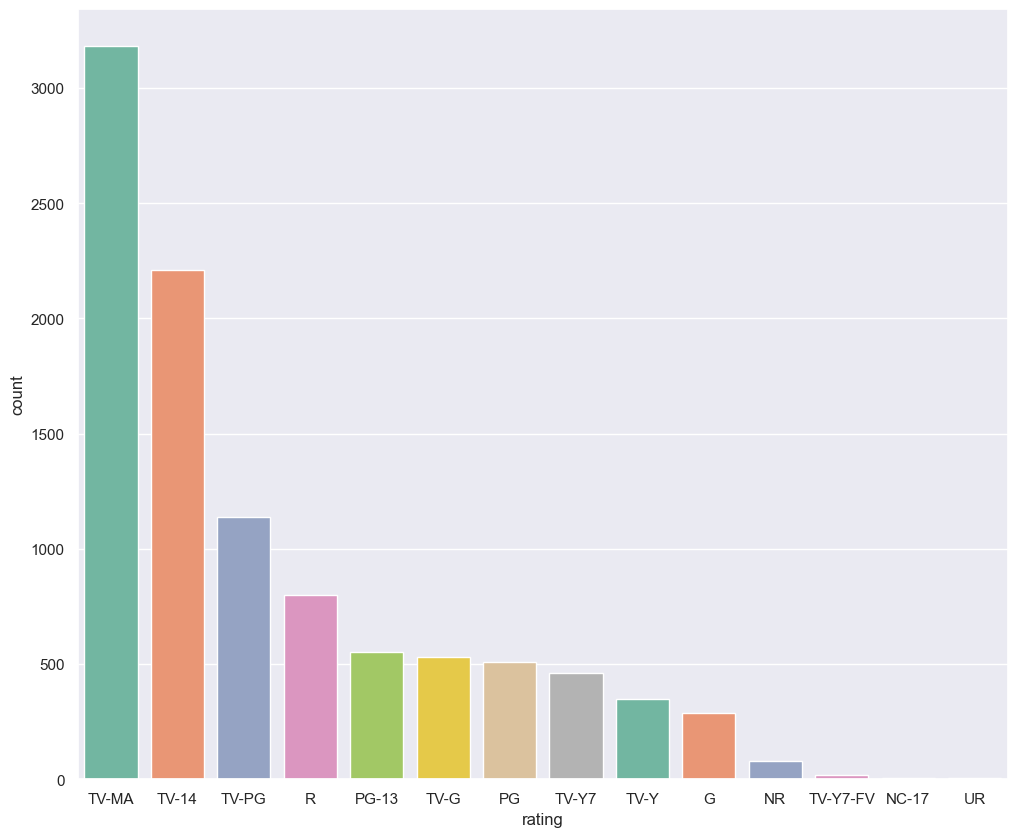

In [180]:
plt.figure(figsize=(12,10))  # Sets the figure size to 12x10 inches for enhanced visibility
sns.set(style="darkgrid")    # Applies the 'darkgrid' style for a visually appealing background
ax = sns.countplot(x="rating", data=df_concat, palette="Set2", order=df_concat['rating'].value_counts().index[0:15])  # Creates a count plot for the 'rating' column, displaying the top 15 ratings

#### The code for creating a stem plot that visualizes the distribution of ratings in the dataset. This type of plot provides a clear representation of how many movies or series fall into each rating category, highlighting trends in viewer preferences.

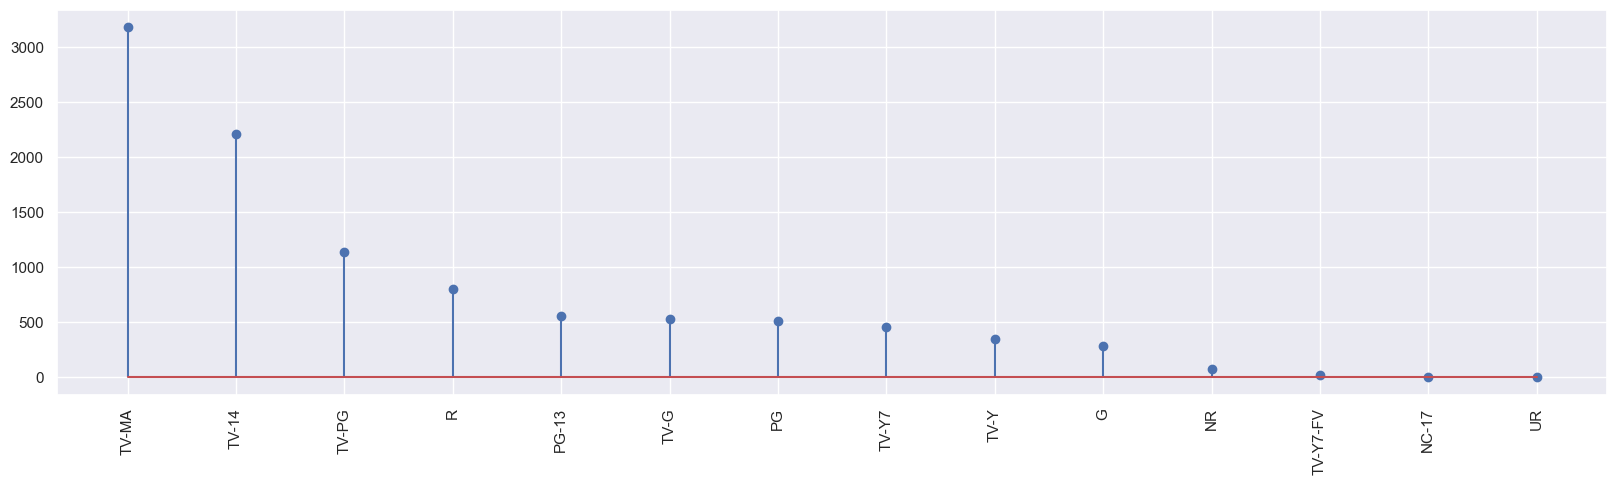

In [181]:
ordered_df = df_concat['rating'].value_counts().index[0:15]  # Gets the top 15 ratings from the 'rating' column

my_range = range(1, len(ordered_df) + 1)  # Creates a range from 1 to the number of ordered ratings
plt.stem(my_range, df_concat['rating'].value_counts().values[0:15])  # Plots a stem plot using the top 15 rating counts
plt.xticks(my_range, ordered_df, rotation=90)  # Sets the x-ticks to the ordered ratings and rotates them for better visibility

plt.show()  # Displays the plot

#  GENRES Vs. THEIR COUNT ON THE GIVEN NETFLIX DATA
#### The code for visualizing the distribution of movie genres in the dataset using a combination of vertical lines and points. This visualization provides insights into the popularity of different genres based on their occurrence in the dataset.

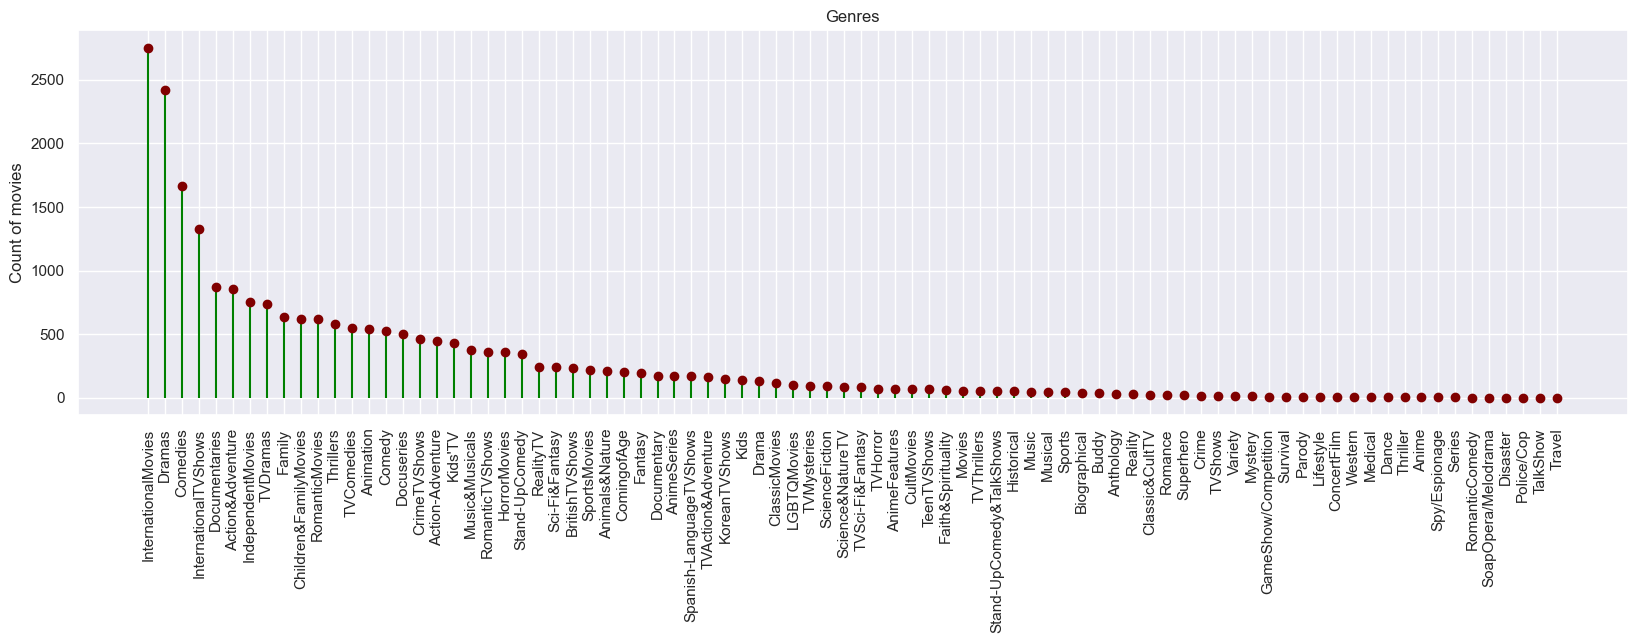

<Figure size 1500x1500 with 0 Axes>

In [182]:
# Extracts the genres from the 'listed_in' column
genres = list(df_concat['listed_in'])
gen = []  # Initializes an empty list to store individual genres

# Iterates through each entry in genres
for i in genres:
    i = list(i.split(','))  # Splits the genres by comma
    for j in i:
        gen.append(j.replace(' ', ""))  # Removes spaces and appends to the list

# Counts the occurrence of each genre
g = Counter(gen)

# Sorts the genres by their counts in descending order
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse=True)}

# Creates a figure and axis for the plot
fig, ax = plt.subplots()

# Sets the figure size
fig = plt.figure(figsize=(15, 15))

# Prepares data for plotting
x = list(g.keys())  # Genres
y = list(g.values())  # Counts of each genre

# Creates vertical lines for each genre count
ax.vlines(x, ymin=0, ymax=y, color='green')
# Plots points for each genre count
ax.plot(x, y, "o", color='maroon')
ax.set_xticklabels(x, rotation=90)  # Rotates the x-axis labels for better readability
ax.set_ylabel("Count of movies")  # Sets the y-axis label
ax.set_title("Genres")  # Sets the title of the plot
plt.show()

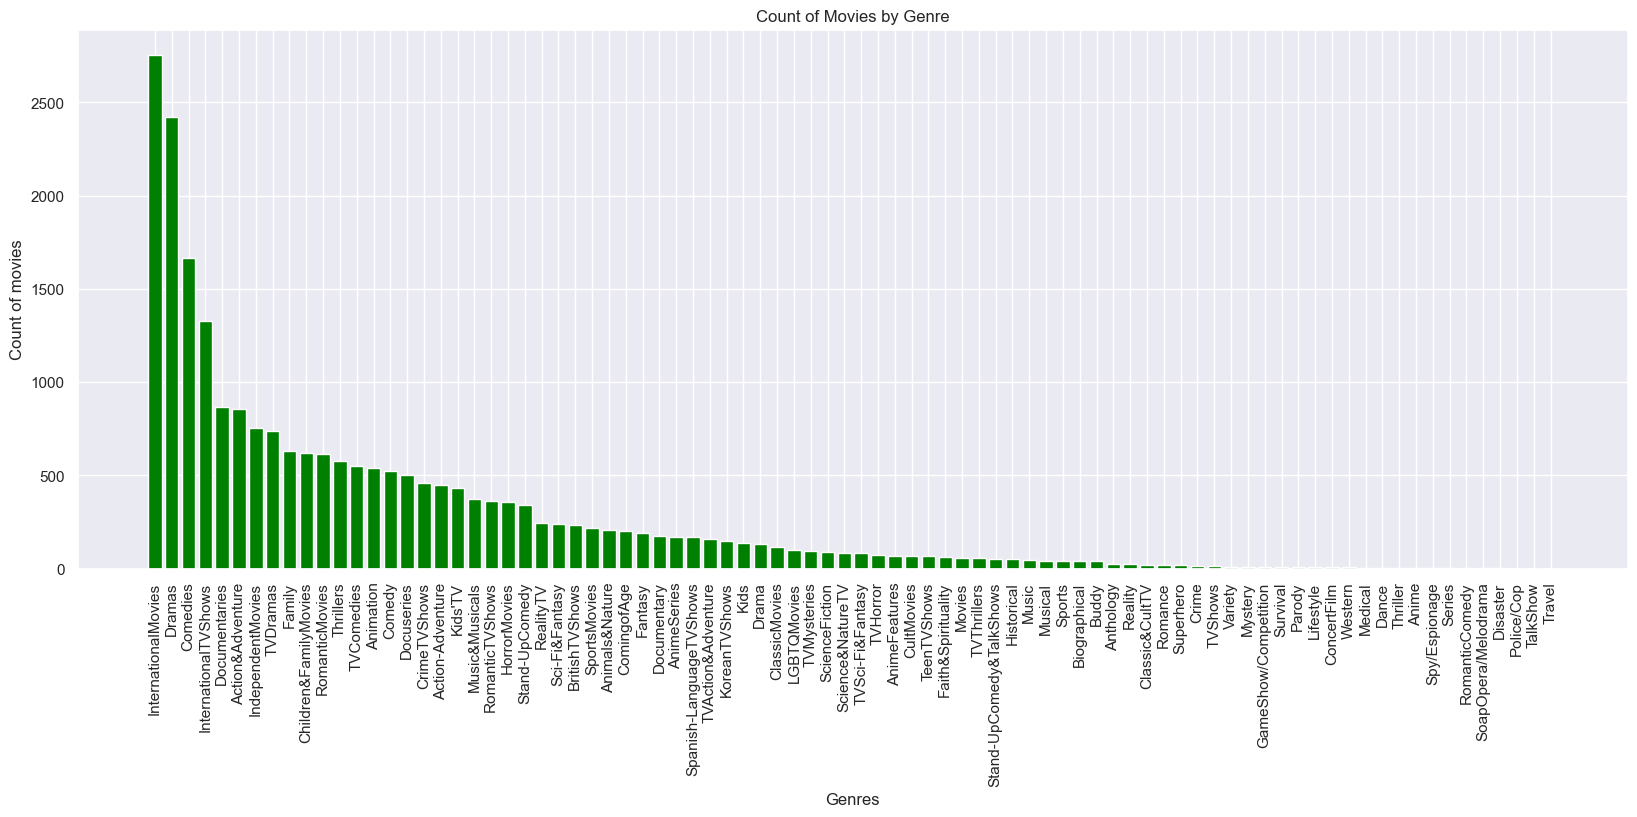

In [183]:
# Extracts the genres from the 'listed_in' column
genres = list(df_concat['listed_in'])
gen = []  # Initializes an empty list to store individual genres

# Iterates through each entry in genres
for i in genres:
    i = list(i.split(','))  # Splits the genres by comma
    for j in i:
        gen.append(j.replace(' ', ""))  # Removes spaces and appends to the list

# Counts the occurrence of each genre
g = Counter(gen)

# Sorts the genres by their counts in descending order
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse=True)}

# Creates a figure and axis for the bar chart
fig, ax = plt.subplots(figsize=(20, 7))

# Prepares data for plotting
x = list(g.keys())  # Genres
y = list(g.values())  # Counts of each genre

# Plots the bar chart
ax.bar(x, y, color='green')

# Rotates the x-axis labels for better readability
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel("Count of movies")  # Sets the y-axis label
ax.set_xlabel("Genres")  # Sets the x-axis label
ax.set_title("Count of Movies by Genre")  # Sets the title of the plot

plt.show()

# ***Director***
#### The code for obtaining the top 10 directors from the dataset based on their occurrence in the 'director' column. This analysis helps identify which directors have the most entries in the dataset, providing insights into prominent contributors in the film industry. 

In [184]:
# Counts the occurrences of each director in the 'director' column
# and selects the top 10 directors (excluding the first one)
top_directors = df_concat['director'].value_counts().iloc[1:11]

# Displays the top 10 directors
top_directors

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Jack Hannah               17
Marcus Raboy              16
Paul Hoen                 16
John Lasseter             16
Suhas Kadav               16
Jay Karas                 15
Robert Vince              14
Cathy Garcia-Molina       13
Name: count, dtype: int64

#### The code for printing the top 10 directors from the dataset, including their ranks. This provides a clear ranking of the most prominent directors based on the number of entries in the 'director' column.

In [185]:
# Print a header indicating the start of the top 10 list
print("first top 10 are:")

# Initialize a counter for ranking the directors
i = 0

# Iterate over the index of the top 10 directors (excluding the first one)
for name in df_concat['director'].value_counts().iloc[1:11].index:
    i += 1  # Increment the counter
    print(i, ">>", name)  # Print the rank and director's name

first top 10 are:
1 >> Rajiv Chilaka
2 >> Raúl Campos, Jan Suter
3 >> Jack Hannah
4 >> Marcus Raboy
5 >> Paul Hoen
6 >> John Lasseter
7 >> Suhas Kadav
8 >> Jay Karas
9 >> Robert Vince
10 >> Cathy Garcia-Molina


#### The code snippet for creating a pie chart that visualizes the distribution of the top 10 directors in the dataset. The pie chart effectively represents each director's share of the total count of entries.

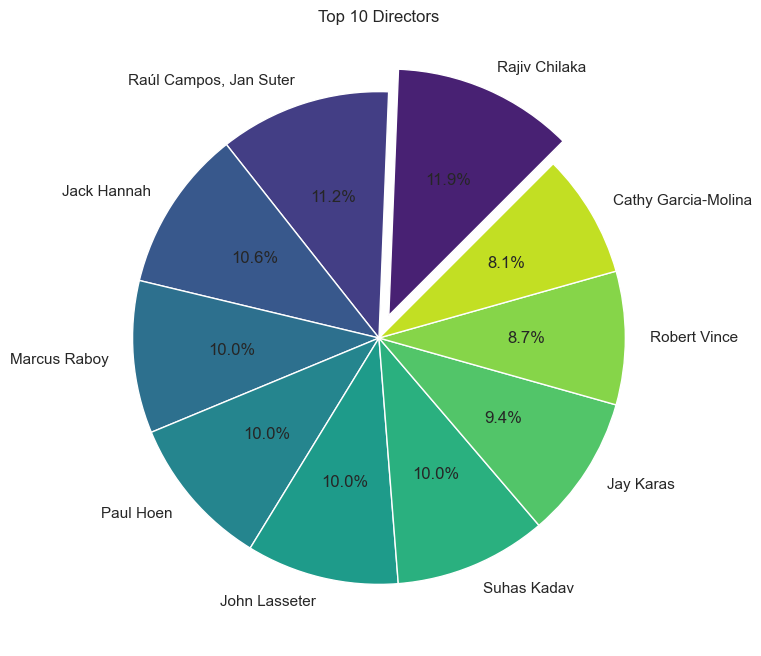

In [186]:
plot_top_entries_pie_chart(df_concat, 'director', start_index=1, end_index=11, title='Top 10 Directors')

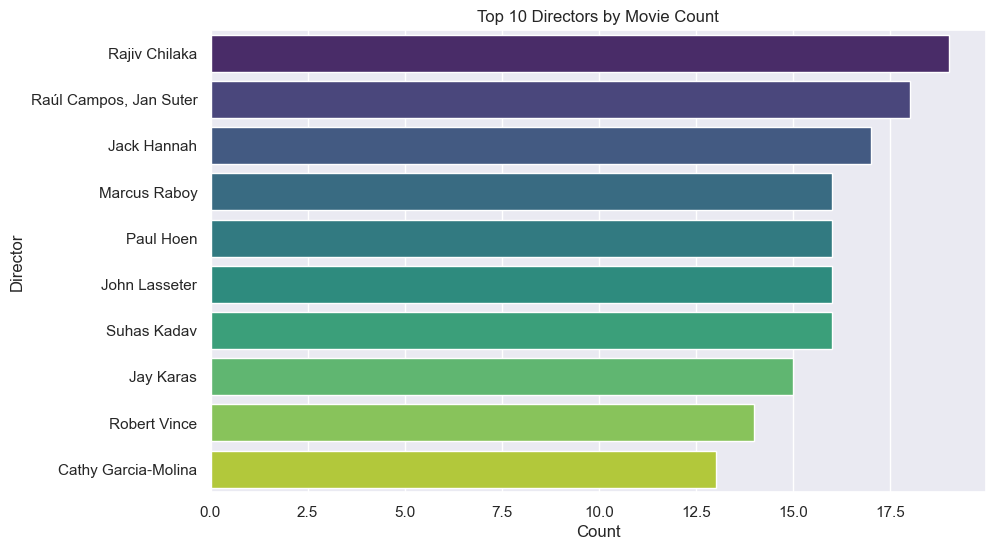

In [187]:
# Convert the dictionary to a DataFrame for easier plotting (already done)
data = df_concat['director'].value_counts().iloc[1:11].to_dict()

Director_data = pd.DataFrame(list(data.items()), columns=['Director', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Count', y='Director', data=Director_data, palette='viridis')  # Horizontal bar plot

# Add labels and title
plt.title('Top 10 Directors by Movie Count')  # Title of the bar chart
plt.xlabel('Count')  # X-axis label
plt.ylabel('Director')  # Y-axis label

# Display the bar chart
plt.show()

#### The code snippet for creating a circular bar plot that visualizes the distribution of the top 10 directors in the dataset. This visualization effectively represents each director's count in a circular format, providing a unique perspective.

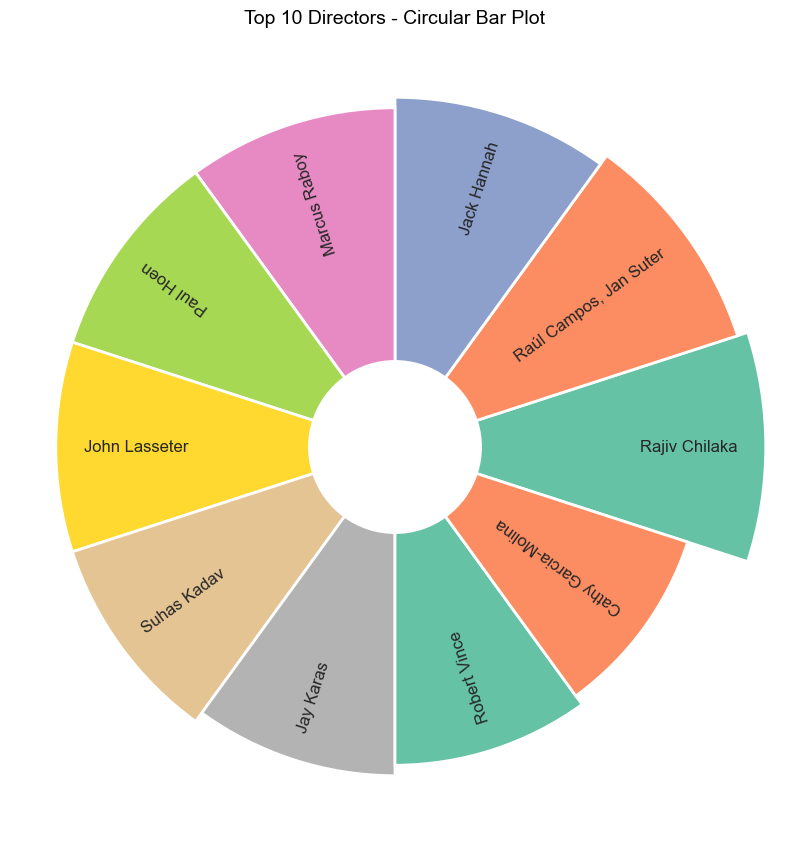

In [188]:
# Data preparation (Top 10 Directors)
data = df_concat['director'].value_counts().iloc[1:11].to_dict()  # Get the top 10 directors and their counts
Directornew_data = pd.DataFrame(list(data.items()), columns=['Director', 'Count'])  # Convert to DataFrame

# Parameters for the design
plt.figure(figsize=(20, 10))  # Set the figure size
ax = plt.subplot(111, polar=True)  # Create a polar subplot
plt.axis('off')  # Turn off the axis

# Grouping colors (similar to the colors in your reference image)
colors = sns.color_palette("Set2", n_colors=10)  # Define a color palette

# Limits for bar heights
upperLimit = 100  # Upper limit for bar height
lowerLimit = 30  # Lower limit for bar height

# Max value for scaling heights
max_value = Directornew_data['Count'].max()  # Get the maximum count for scaling

# Scaling the heights of the bars
slope = (upperLimit - lowerLimit) / max_value  # Calculate the slope for scaling
heights = slope * Directornew_data['Count'] + lowerLimit  # Scale the heights

# Compute the width of each bar. In total, 2*pi is the circle's circumference
width = 2 * np.pi / len(Directornew_data.index)  # Calculate the width of each bar

# Compute the angle for each bar
angles = [element * width for element in range(len(Directornew_data.index))]  # Calculate angles for bars

# Add bars to the plot
bars = ax.bar(
    x=angles, 
    height=heights,  # Heights of the bars
    width=width,  # Width of the bars
    bottom=lowerLimit,  # Bottom position of the bars
    linewidth=2,  # Line width of bar edges
    edgecolor="white",  # Color of the bar edges
    color=colors  # Color of the bars
)

# Add labels for each bar and move them further outside
for angle, height, label in zip(angles, heights, Directornew_data['Director']):
    rotation = np.rad2deg(angle)  # Convert from radians to degrees
    alignment = 'right' if rotation < 180 else 'left'  # Determine text alignment
    
    # Adjust text rotation so that the labels are readable
    ax.text(
        x=angle, 
        y=height + 20,  # Increase the offset to move the label outside of the graph
        s=label,  # Director name
        ha=alignment,  # Horizontal alignment
        va='center', 
        rotation=rotation if rotation < 180 else rotation - 180,  # Rotate text for readability
        rotation_mode='anchor'  # Use anchor rotation mode
    )

# Set the title
plt.title('Top 10 Directors - Circular Bar Plot', size=14, color='black')  # Title of the plot

# Show the plot
plt.show()  # Display the plot

#### The code creates a new dataset named movie by filtering the original DataFrame for movies, replacing "min" with a space in the duration column, and then analyzing the relationship between duration and release_year.

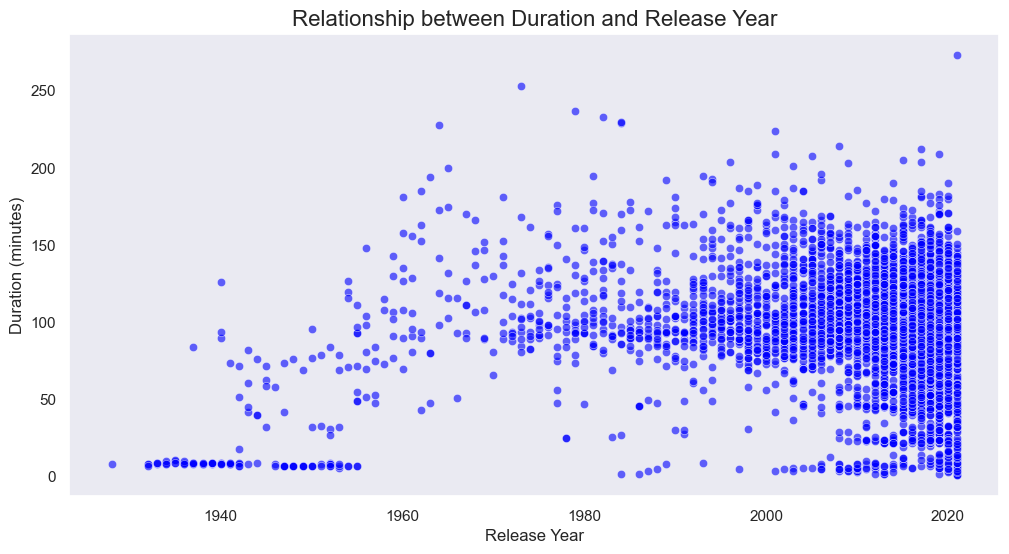

In [189]:
# Step 1: Create a new dataset named 'movie' by filtering for 'Movie' type
movie = df_concat[df_concat['type'] == 'Movie']

# Step 2: Replace 'min' in the duration column with an empty string to keep only the numeric value
movie['duration'] = movie['duration'].str.replace(' min', '', regex=False)

# Step 3: Convert the duration to an integer type
movie['duration'] = movie['duration'].astype(int)

# Step 4: Analyze the relationship between 'duration' and 'release_year'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='duration', data=movie, color='blue', alpha=0.6)

# Set the title and labels
plt.title('Relationship between Duration and Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.grid()

# Show the plot
plt.show()

### The code creates a new dataset named movie, filters for movies from the original DataFrame, processes the duration column, and then generates a histogram to visualize the distribution of movie durations using Plotly.

In [190]:
# Step 1: Create a new dataset named 'movie' by filtering for 'Movie' type
movie = df_concat[df_concat['type'] == 'Movie']

In [191]:
# Step 2: Replace ' min' in the duration column with an empty string and convert to int
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

print(movie['duration'].dtype)  # Print the data type of the 'duration' column

int32


# ***Distribution of movie Durations and Tv Shows***

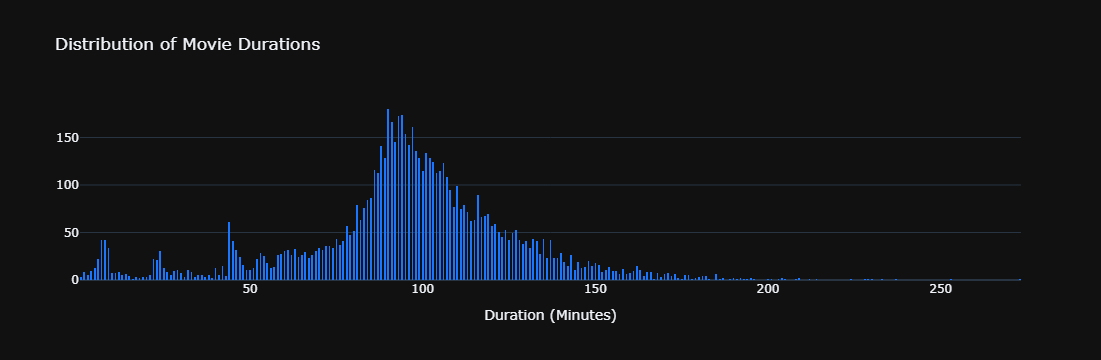

In [192]:
# Step 3: Create a histogram for movie durations
trace = go.Histogram(
    x=movie['duration'],  # Use movie duration for x-axis
    xbins=dict(size=0.5),  # Set the size of each bin in the histogram
    marker=dict(color='rgb(26, 118, 255)')  # Set the color of the bars
)

# Step 4: Define layout for the histogram
layout = go.Layout(
    template="plotly_dark",  # Dark theme layout
    title='Distribution of Movie Durations',  # Title of the plot
    xaxis=dict(title='Duration (Minutes)')  # X-axis label
)

# Step 5: Create a figure and show the plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()

#### The code creates a histogram to visualize the distribution of durations for TV shows in your dataset, using Plotly Express.

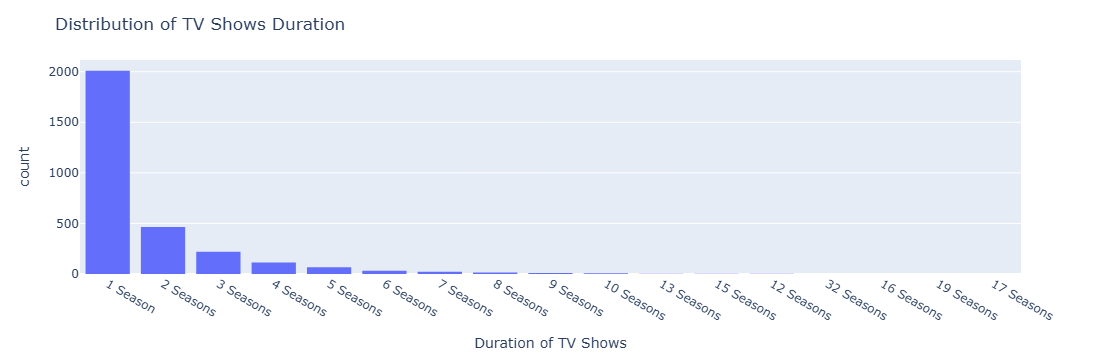

In [193]:
import pandas as pd
import plotly.express as px

# Step 1: Create a new DataFrame for TV shows by filtering the original DataFrame
df_tv = df_concat[df_concat["type"] == "TV Show"]

# Step 2: Create a histogram for the duration of TV shows
fig = px.histogram(df_tv, x='duration')  # Use the 'duration' column for the x-axis

# Step 3: Update the x-axis to order categories by total count in descending order
fig.update_xaxes(categoryorder="total descending")

# Step 4: Update the layout with titles
fig.update_layout(
    title="Distribution of TV Shows Duration",  # Title of the plot
    xaxis_title="Duration of TV Shows",  # X-axis label
)

# Step 5: Show the plot
fig.show()


# **2 Features**

# ***Content Type available according to ratings***

####  The code for creating a count plot that visualizes the distribution of content types according to their ratings in your dataset.

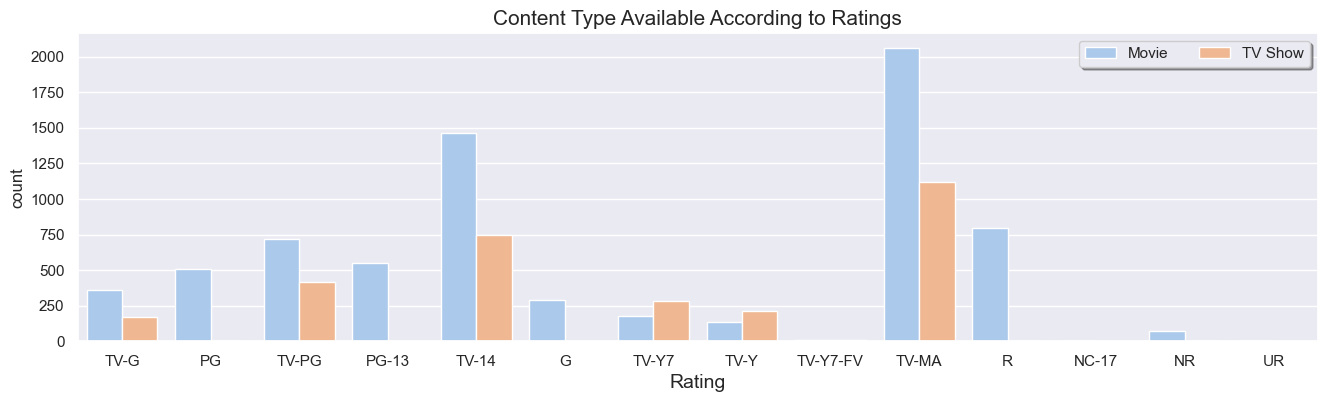

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Set the figure size
plt.figure(figsize=(16, 4))

# Step 2: Create a count plot using Seaborn
ax = sns.countplot(data=df_concat, x='rating', hue='type', palette='pastel')

# Step 3: Set the title of the plot
plt.title('Content Type Available According to Ratings', fontsize=15)

# Step 4: Set the x-axis label
plt.xlabel('Rating', fontsize=14)

# Step 5: Customize the legend
ax.legend(ncol=3, fancybox=True, shadow=True)

# Step 6: Show the plot
plt.show()

<Figure size 2500x600 with 0 Axes>

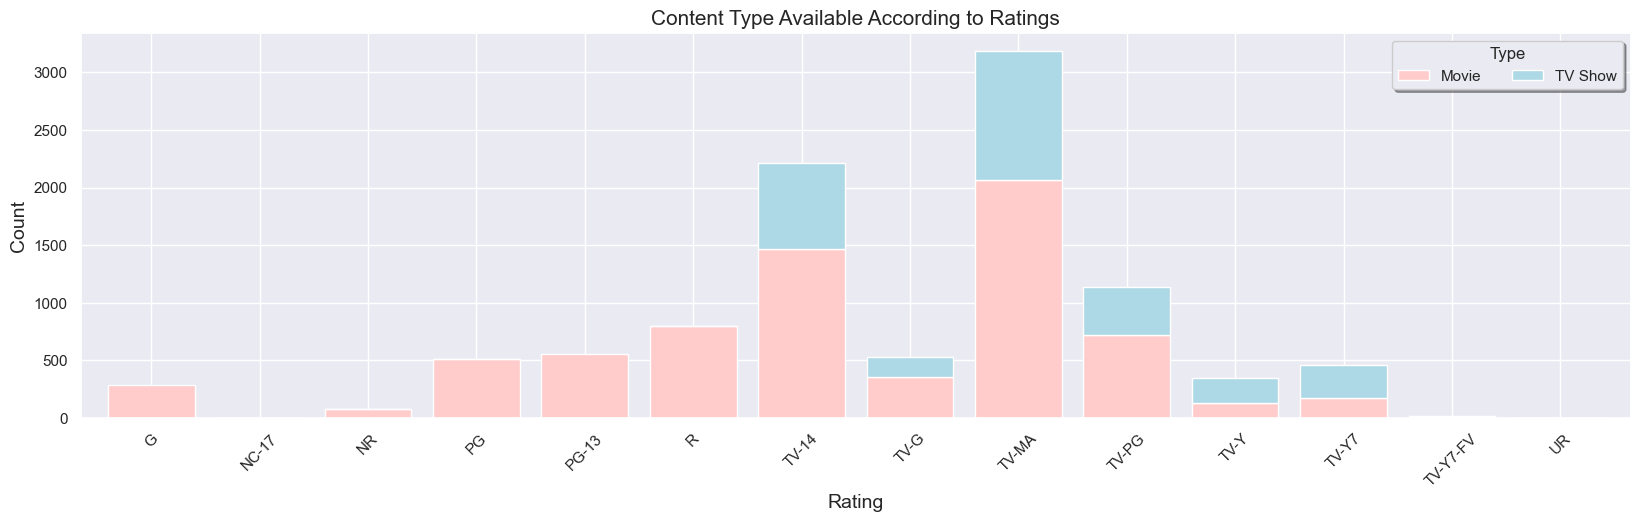

In [195]:
# Step 1: Prepare data for a stacked bar plot
# Count the number of occurrences for each combination of 'rating' and 'type'
rating_type_counts = df_concat.groupby(['rating', 'type']).size().unstack()

# Step 2: Set the figure size
plt.figure(figsize=(25, 6))

# Step 3: Create a stacked bar plot
rating_type_counts.plot(kind='bar', stacked=True, color=['#ffcccb', '#add8e6'], width=0.8)

# Step 4: Set the title of the plot
plt.title('Content Type Available According to Ratings', fontsize=15)

# Step 5: Set the x-axis label and rotate tick labels for clarity
plt.xlabel('Rating', fontsize=14)
plt.xticks(rotation=45)

# Step 6: Set the y-axis label
plt.ylabel('Count', fontsize=14)

# Step 7: Customize the legend
plt.legend(title='Type', ncol=3, fancybox=True, shadow=True)

# Step 8: Show the plot
plt.show()

# ***Relationship between the release year of a movie and its duration***

#### The code for creating a scatter plot that visualizes the relationship between the release year and the duration of movies in the dataset.

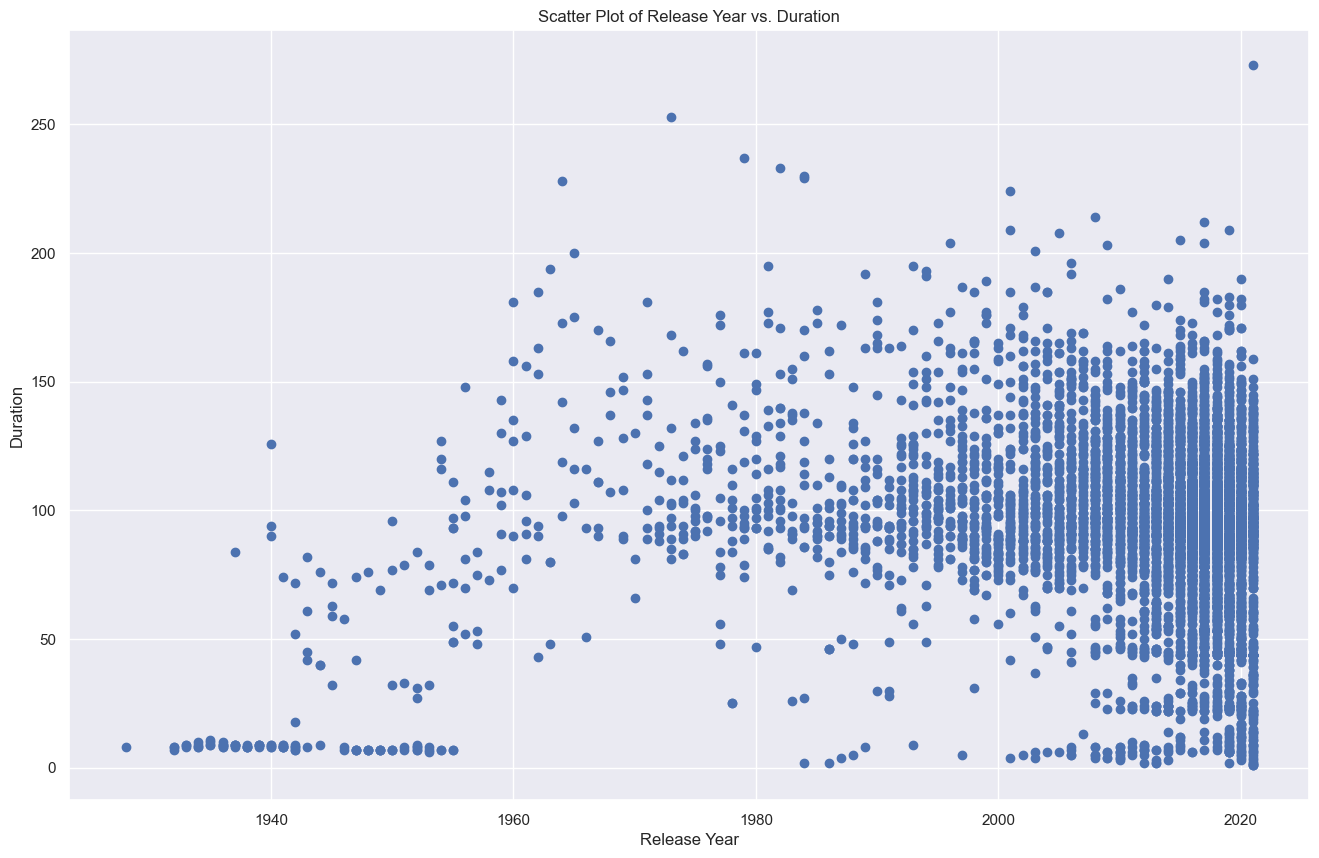

In [196]:
import matplotlib.pyplot as plt

# Step 1: Set the figure size
plt.figure(figsize=(16, 10))

# Step 2: Create a scatter plot using matplotlib
plt.scatter(movie['release_year'], movie['duration'])

# Step 3: Add labels for the x and y axes
plt.xlabel('Release Year')
plt.ylabel('Duration')

# Step 4: Set the title of the plot
plt.title('Scatter Plot of Release Year vs. Duration')

# Step 5: Display the plot
plt.show()


# **Observations that can be made from the plot:**

* The longest movie in the dataset is about 250 minutes long, and it was released in 1973.
* The shortest movie in the dataset is between 4 and 10  minutes long, and it was released before 1940.
* The average duration of movies with a duration between 75 and 150 minutes

#### The code for finding and printing the movie with the maximum duration in the dataset.

In [197]:
# Step 1: Find the index of the movie with the maximum duration
max_duration_index = movie['duration'].idxmax()

# Step 2: Retrieve the release year of the movie with the maximum duration
corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']

# Step 3: Retrieve the maximum duration value
max_duration = movie.loc[max_duration_index, 'duration']

# Step 4: Print the result
print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie with the maximum duration of 273 minutes was released in the year 2021.


# ***Growth in content over the years***
#### The code for visualizing the count of content (TV Shows and Movies) added over the years in the dataset

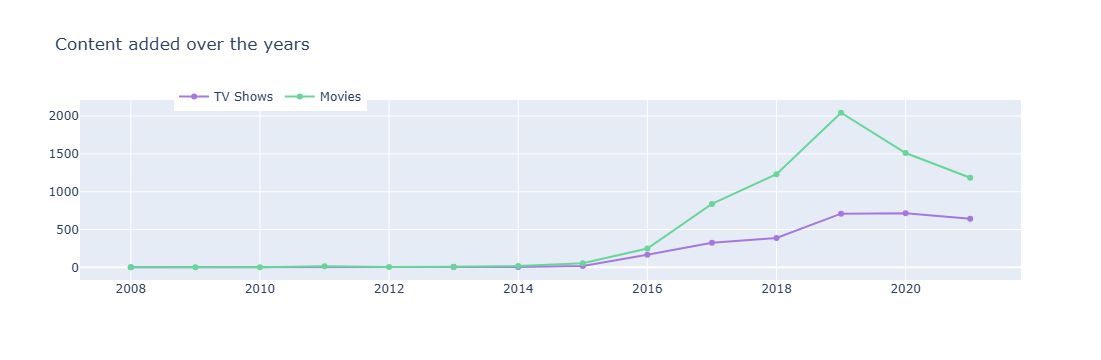

<Figure size 1600x1000 with 0 Axes>

In [198]:
# Step 1: Separate the dataset into TV Shows and Movies
d1 = df_concat[df_concat["type"] == "TV Show"]
d2 = df_concat[df_concat["type"] == "Movie"]

# Step 2: Specify the column for analysis
col = "year_added"

# Step 3: Count the occurrences of each year for TV Shows
vc1 = d1[col].value_counts().reset_index()  # Create a count of each year
vc1.columns = [col, 'count']  # Rename the columns
vc1['count'] = vc1['count'].astype(int)  # Ensure count is of integer type
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))  # Calculate percentages
vc1 = vc1.sort_values(col)  # Sort by year

# Step 4: Count the occurrences of each year for Movies
vc2 = d2[col].value_counts().reset_index()  # Create a count of each year
vc2.columns = [col, 'count']  # Rename the columns
vc2['count'] = vc2['count'].astype(int)  # Ensure count is of integer type
vc2['percent'] = vc2['count'].apply(lambda x: 100 * x / sum(vc2['count']))  # Calculate percentages
vc2 = vc2.sort_values(col)  # Sort by year

# Step 5: Create the plot
plt.figure(figsize=(16, 10))

# Step 6: Create Scatter traces for TV Shows and Movies
trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))

# Step 7: Combine the traces into a data list
data = [trace1, trace2]

# Step 8: Define the layout for the plot
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))

# Step 9: Create the figure and show the plot
fig = go.Figure(data, layout=layout)
fig.show()


# ***TOP MOVIE & TV SHOW RATINGS BASED ON RATING SYSTEM***

In [199]:
# Step 1: Create a new DataFrame that includes only TV Shows
df_tv = df_concat[df_concat["type"] == "TV Show"]  # Filter rows where 'type' is 'TV Show'

#### The code for creating a point plot that visualizes the top movie ratings based on the rating system

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_movie_ratings_count(movie_df):
    # Step 1: Group the movies by rating and count the number of shows for each rating
    movie_ratings = movie_df.groupby(['rating'])['type'].count().reset_index(name='count').sort_values(by='count', ascending=False)

    # Step 2: Define the figure dimensions for the plot
    fig_dims = (18, 7)

    # Step 3: Create a subplot with the specified dimensions
    fig, ax = plt.subplots(figsize=fig_dims)  

    # Step 4: Create a point plot for the ratings and their counts
    sns.pointplot(x='rating', y='count', data=movie_ratings)
    # Step 5: Display the plot
    plt.show()

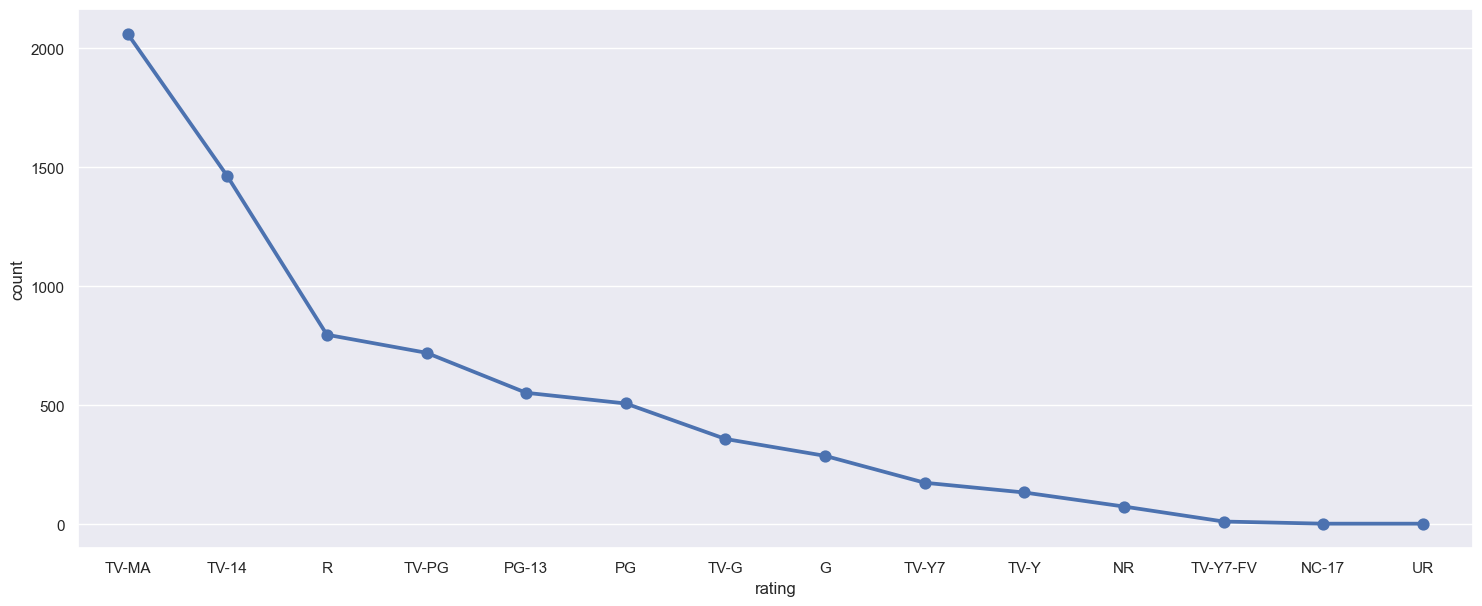

In [213]:
plot_movie_ratings_count(movie)

#### The code for creating a point plot that visualizes the top TV show ratings based on the rating system

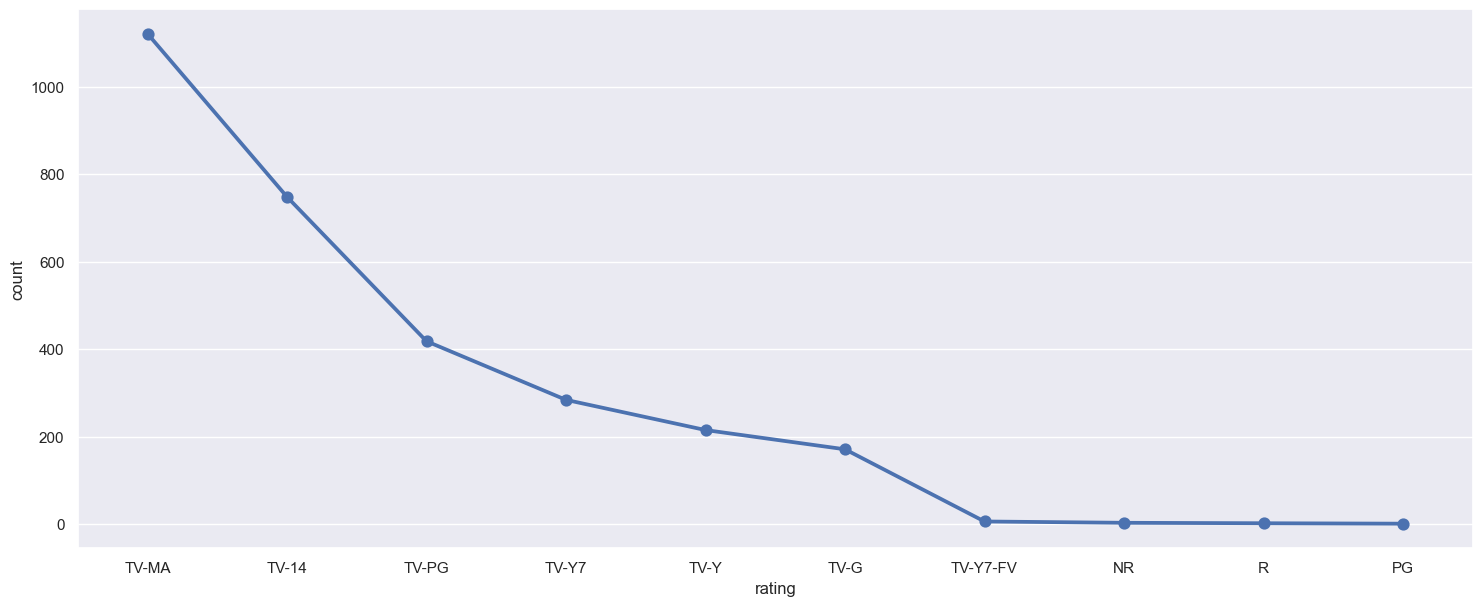

In [214]:
plot_movie_ratings_count(df_tv)

#### The code for creating a bar chart that visualizes the number of TV shows added in each month

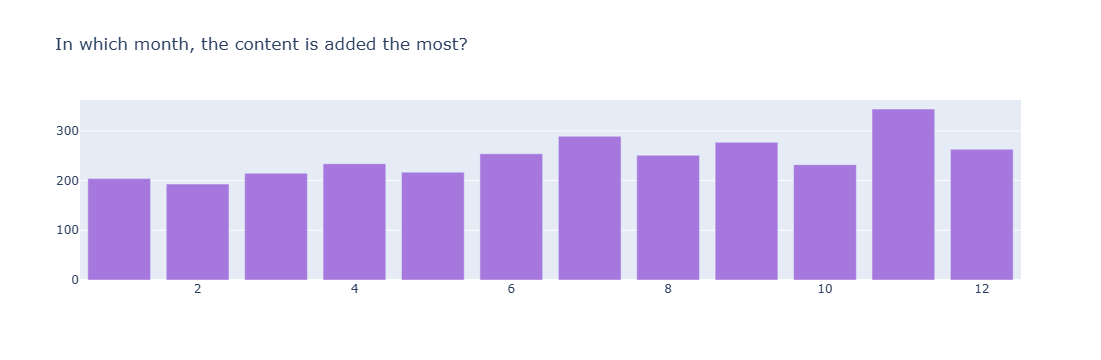

In [203]:
# Step 1: Set the column name for the month when content was added
col = 'month_added'

# Step 2: Count the occurrences of each month in the 'month_added' column
vc1 = d1[col].value_counts().reset_index()

# Step 3: Rename the columns for clarity
vc1.columns = [col, 'count']

# Step 4: Convert the 'count' column to integer type
vc1['count'] = vc1['count'].astype(int) 

# Step 5: Calculate the percentage of each month's count relative to the total
vc1['percent'] = vc1['count'].apply(lambda x: 100 * x / sum(vc1['count']))

# Step 6: Sort the DataFrame by month
vc1 = vc1.sort_values(col)

# Step 7: Create a bar chart with the months on the x-axis and the counts on the y-axis
trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))

# Step 8: Prepare the layout for the figure
data = [trace1]
layout = go.Layout(title="In which month, the content is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))

# Step 9: Create and display the figure
fig = go.Figure(data, layout=layout)
fig.show()

#### The code for creating a bar chart that visualizes the number of movies added in each month,

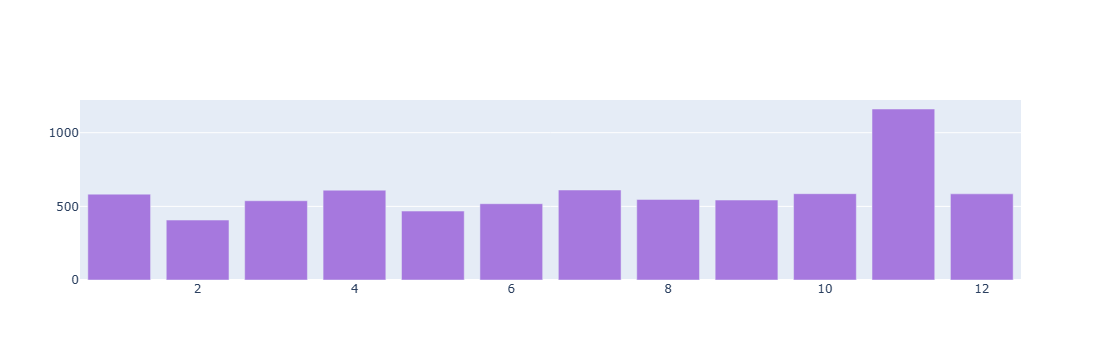

<Figure size 1600x1000 with 0 Axes>

In [204]:
# Step 1: Set the column name for the month when content was added
col = 'month_added'

# Step 2: Count the occurrences of each month in the 'month_added' column for movies
vc2 = d2[col].value_counts().reset_index()

# Step 3: Rename the columns for clarity
vc2.columns = [col, 'count']

# Step 4: Convert the 'count' column to integer type
vc2['count'] = vc2['count'].astype(int)

# Step 5: Calculate the percentage of each month's count relative to the total
vc2['percent'] = vc2['count'].apply(lambda x: 100 * x / sum(vc2['count']))

# Step 6: Sort the DataFrame by month
vc2 = vc2.sort_values(col)

# Step 7: Create a bar chart with the months on the x-axis and the counts on the y-axis
plt.figure(figsize=(16, 10))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#a678de"))

# Step 8: Prepare the figure with the data
data2 = [trace2]
fig = go.Figure(data2)

# Step 9: Show the figure
fig.show()

#### The code for creating a bar chart that visualizes the release years of movies from the top 10 directors

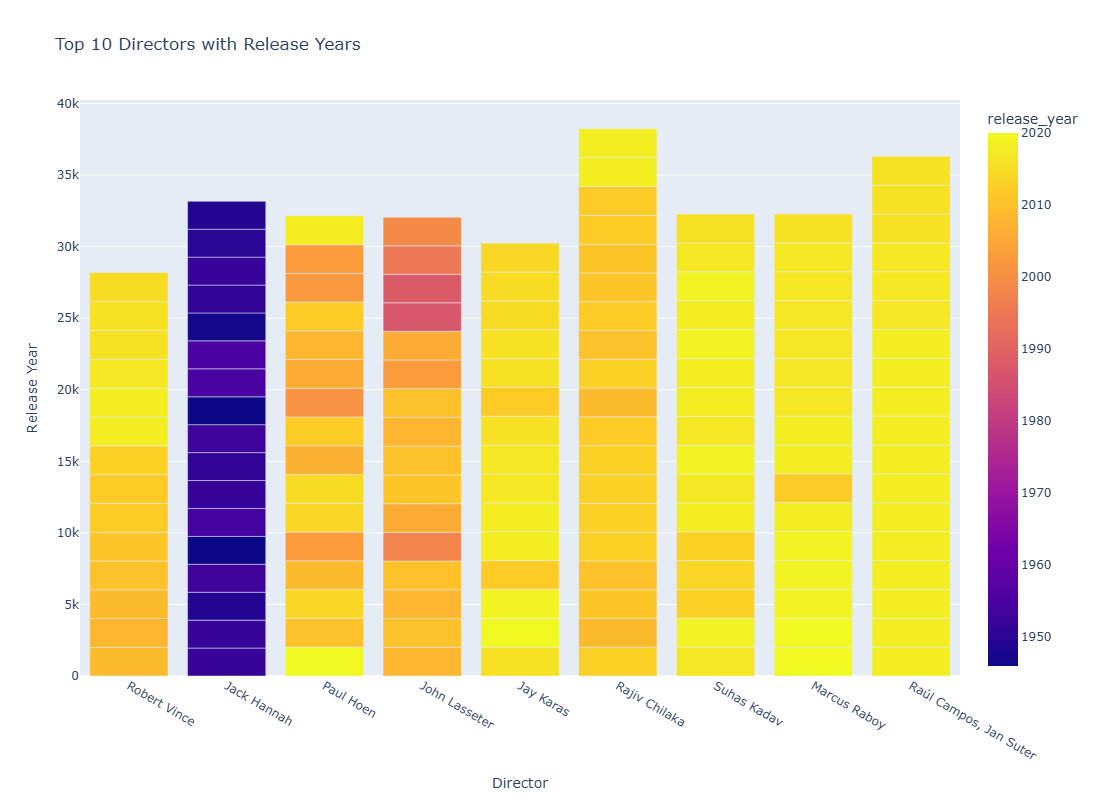

Plot generated and displayed, 'No Data' excluded.


In [205]:
# Step 1: Create a new DataFrame excluding rows where 'director' is NaN
director_years = df_concat.dropna(subset=['director'])

# Step 2: Get the top 10 directors based on their occurrence in the dataset
top_10_directors = director_years['director'].value_counts().head(10).index

# Step 3: Exclude any director labeled as 'No Data'
top_10_directors = top_10_directors[top_10_directors != 'No Data']

# Step 4: Filter the original DataFrame to only include entries from the top 10 directors
director_years_top10 = director_years[director_years['director'].isin(top_10_directors)]

# Step 5: Create a bar chart using Plotly Express
fig1 = px.bar(director_years_top10, 
               x='director', 
               y='release_year', 
               color='release_year',
               title='Top 10 Directors with Release Years', 
               height=800, 
               width=1200)

# Step 6: Update the layout with axis titles
fig1.update_layout(xaxis_title='Director', yaxis_title='Release Year')

# Step 7: Show the figure
fig1.show()

# Step 8: Print a message indicating the plot has been generated
print("Plot generated and displayed, 'No Data' excluded.")

#### The code for creating a histogram that visualizes the distribution of ratings by content type (Movies and TV Shows)

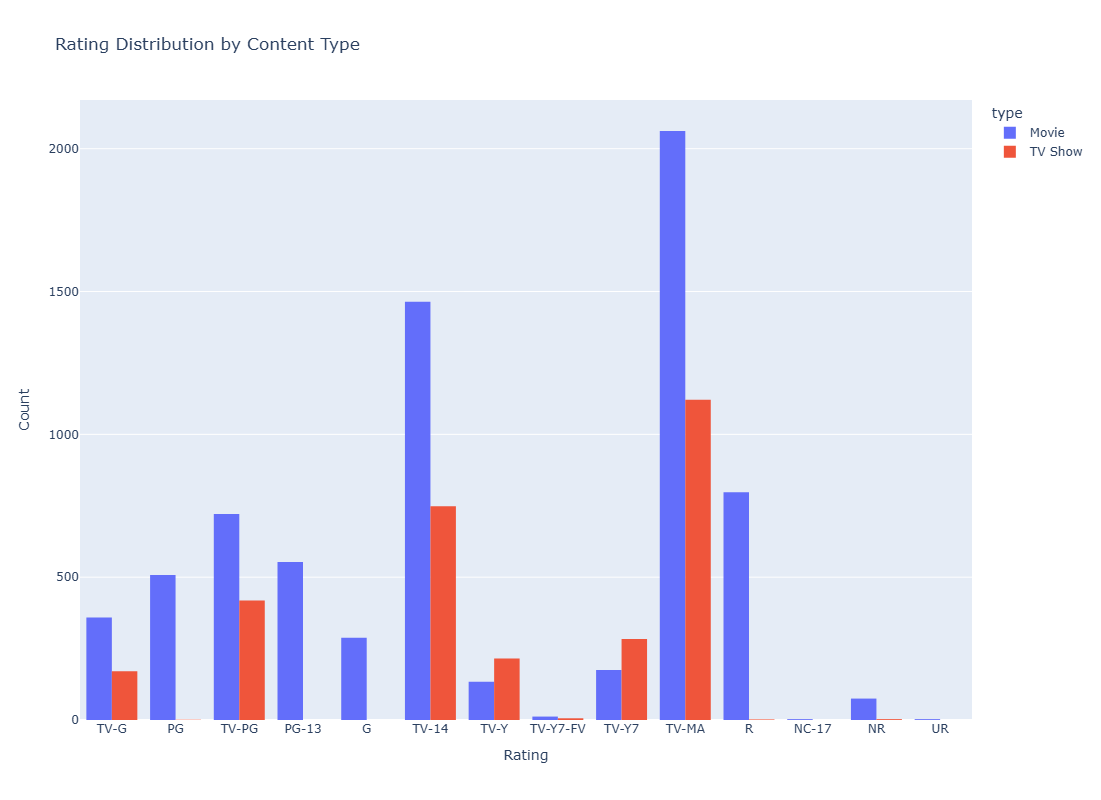

In [206]:
# Step 1: Create a histogram using Plotly Express
fig2 = px.histogram(
    df_concat,               # DataFrame containing the data
    x='rating',              # X-axis will show the 'rating'
    color='type',            # Bars will be colored based on 'type' (Movie or TV Show)
    barmode='group',         # Bars for different content types will be grouped together
    title='Rating Distribution by Content Type',  # Title of the plot
    height=800,              # Set the height of the plot
    width=1200               # Set the width of the plot
)

# Step 2: Update the layout to include axis titles
fig2.update_layout(
    xaxis_title='Rating',     # X-axis title
    yaxis_title='Count'       # Y-axis title
)

# Step 3: Show the figure
fig2.show()

#### The code for creating a scatter plot that visualizes the relationship between countries and release years, focusing on the top 10 countries with the highest content release count. 

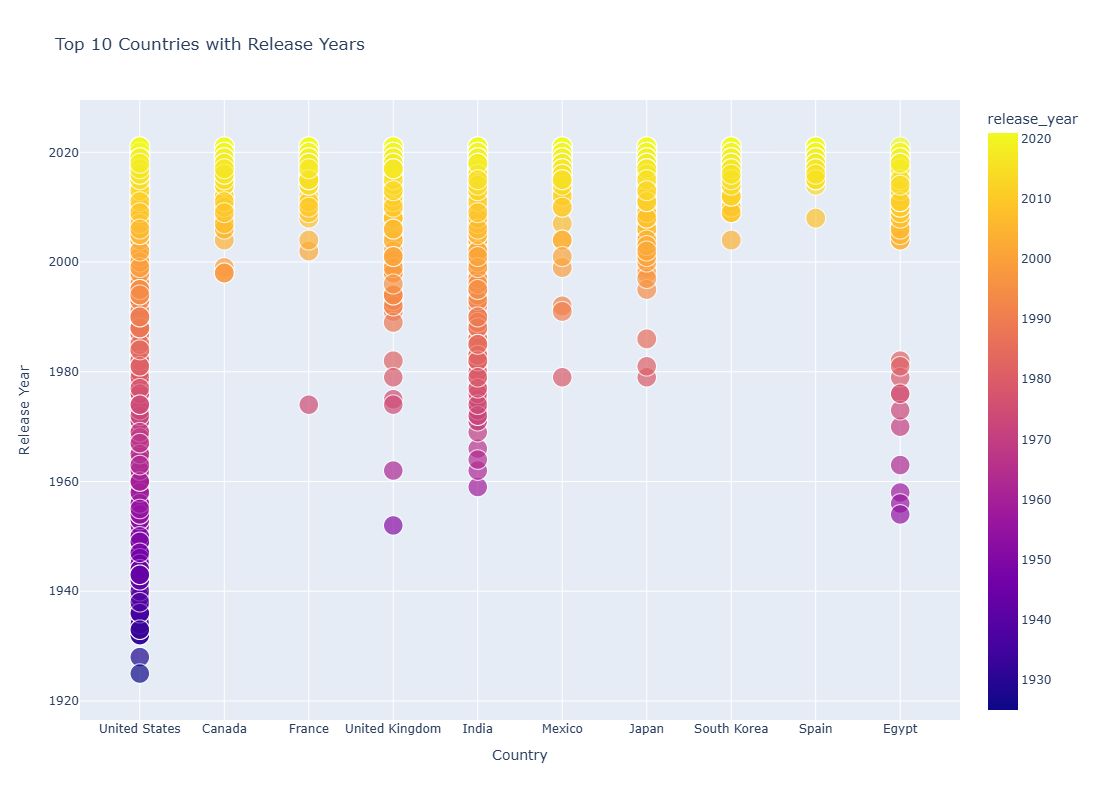

In [207]:
# Step 1: Prepare the data by filtering out rows with missing country values
country_years = df_concat.dropna(subset=['country'])

# Step 2: Identify the top 10 countries based on the count of content
top_10_countries = country_years['country'].value_counts().head(10).index

# Step 3: Filter the dataset to include only the top 10 countries
country_years_top10 = country_years[country_years['country'].isin(top_10_countries)]

# Step 4: Create a scatter plot using Plotly Express
fig4 = px.scatter(
    country_years_top10,                # DataFrame containing the filtered data
    x='country',                         # X-axis will show the 'country'
    y='release_year',                    # Y-axis will show the 'release_year'
    color='release_year',                # Points will be colored based on 'release_year'
    size='release_year',                 # Size of points will also represent 'release_year'
    title='Top 10 Countries with Release Years',  # Title of the plot
    height=800,                          # Set the height of the plot
    width=1200                           # Set the width of the plot
)

# Step 5: Update the layout to include axis titles
fig4.update_layout(
    xaxis_title='Country',               # X-axis title
    yaxis_title='Release Year'           # Y-axis title
)

# Step 6: Show the figure
fig4.show()


#### The code for creating a line plot to visualize trends in content releases over the years using Plotly Express. This visualization will help to understand how the number of releases has changed over time.

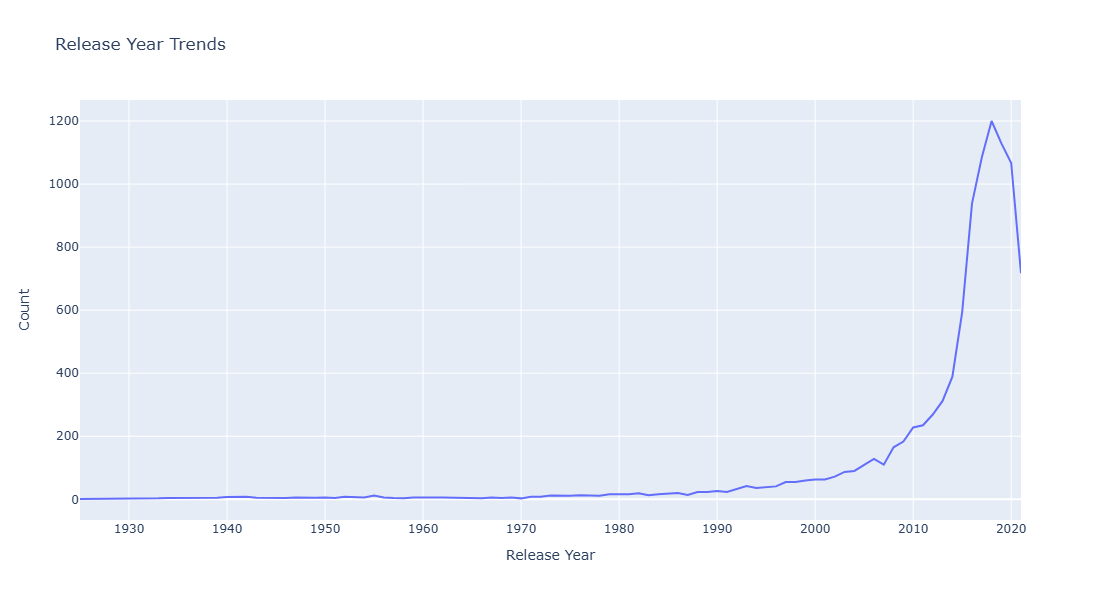

In [208]:
# Step 1: Count the occurrences of each release year and sort by year
release_year_counts = df_concat['release_year'].value_counts().sort_index().reset_index()

# Step 2: Rename the columns for clarity
release_year_counts.columns = ['Release Year', 'Count']

# Step 3: Create a line plot using Plotly Express
fig6 = px.line(
    release_year_counts,              # DataFrame containing the counts per year
    x='Release Year',                 # X-axis showing 'Release Year'
    y='Count',                        # Y-axis showing the 'Count' of releases
    title='Release Year Trends',      # Title of the plot
    height=600,                       # Set the height of the plot
    width=1000                        # Set the width of the plot
)

# Step 4: Show the figure
fig6.show()


### Most trend between 2013 to 2020